# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [4]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [8]:
#separating byte files and asm files 

source = 'train/train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

01azqd4InC7m9JpocGv5.asm
01azqd4InC7m9JpocGv5.bytes
01IsoiSMh5gxyDYTl4CB.asm
01IsoiSMh5gxyDYTl4CB.bytes
01jsnpXSAlgw6aPeDxrU.asm
01jsnpXSAlgw6aPeDxrU.bytes
01kcPWA9K2BOxQeS5Rju.asm
01kcPWA9K2BOxQeS5Rju.bytes
01SuzwMJEIXsK7A8dQbl.asm
01SuzwMJEIXsK7A8dQbl.bytes
02IOCvYEy8mjiuAQHax3.asm
02IOCvYEy8mjiuAQHax3.bytes
02JqQ7H3yEoD8viYWlmS.asm
02JqQ7H3yEoD8viYWlmS.bytes
02K5GMYITj7bBoAisEmD.asm
02K5GMYITj7bBoAisEmD.bytes
02mlBLHZTDFXGa7Nt6cr.asm
02mlBLHZTDFXGa7Nt6cr.bytes
02MRILoE6rNhmt7FUi45.asm
02MRILoE6rNhmt7FUi45.bytes
02zcUmKV16Lya5xqnPGB.asm
02zcUmKV16Lya5xqnPGB.bytes
03nJaQV6K2ObICUmyWoR.asm
03nJaQV6K2ObICUmyWoR.bytes
04BfoQRA6XEshiNuI7pF.asm
04BfoQRA6XEshiNuI7pF.bytes
04cvLCVPqBMs6yn5xGlE.asm
04cvLCVPqBMs6yn5xGlE.bytes
04EjIdbPV5e1XroFOpiN.asm
04EjIdbPV5e1XroFOpiN.bytes
04hSzLv5s2TDYPlcgpHB.asm
04hSzLv5s2TDYPlcgpHB.bytes
04mcPSei852tgIKUwTJr.asm
04mcPSei852tgIKUwTJr.bytes
04QzZ3DVdPsEp9elLR65.asm
04QzZ3DVdPsEp9elLR65.bytes
04sJnMaORYc1SV5pKjrP.asm
04sJnMaORYc1SV5pKjrP.bytes
05aiMRw13bYW

0MQD6mnoy4l3zV8WPRYe.asm
0MQD6mnoy4l3zV8WPRYe.bytes
0MsQ16zDg9XVerbmfCdU.asm
0MsQ16zDg9XVerbmfCdU.bytes
0Mx7E5XgoRcJavdPAit8.asm
0Mx7E5XgoRcJavdPAit8.bytes
0NEsQlDGnUMg3Bew7R1A.asm
0NEsQlDGnUMg3Bew7R1A.bytes
0NiOTDde1ktxg954SJFE.asm
0NiOTDde1ktxg954SJFE.bytes
0njs7MJQObCY8ABgykiP.asm
0njs7MJQObCY8ABgykiP.bytes
0NmoAEOtIDdwiVr9PCBf.asm
0NmoAEOtIDdwiVr9PCBf.bytes
0NXFnJyOEhBAISKfiU67.asm
0NXFnJyOEhBAISKfiU67.bytes
0nxrvcZJUBNGM8Vg4SRf.asm
0nxrvcZJUBNGM8Vg4SRf.bytes
0NyfGXt8nmlK72Q9Irhs.asm
0NyfGXt8nmlK72Q9Irhs.bytes
0NZT2sFp4JKXqYGC8Rna.asm
0NZT2sFp4JKXqYGC8Rna.bytes
0odUVkrjp2B1n8NDS6bR.asm
0odUVkrjp2B1n8NDS6bR.bytes
0OfazrXvcTqVYi3dEGU9.asm
0OfazrXvcTqVYi3dEGU9.bytes
0OQ9MEykugoYZJrnj64d.asm
0OQ9MEykugoYZJrnj64d.bytes
0otC2dSxuGDzY6XHLkq3.asm
0otC2dSxuGDzY6XHLkq3.bytes
0OXtHMVdxJuvezcLRGZQ.asm
0OXtHMVdxJuvezcLRGZQ.bytes
0P6tEopzr2mIhkuOKiCD.asm
0P6tEopzr2mIhkuOKiCD.bytes
0p8RCBnvzTYMlId9SoZL.asm
0p8RCBnvzTYMlId9SoZL.bytes
0pER9ak46CKVjPoqGLcD.asm
0pER9ak46CKVjPoqGLcD.bytes
0PGoOfXAjVDB

15tQNEDpb0mi63kfOWM8.asm
15tQNEDpb0mi63kfOWM8.bytes
15uCdAByiF48LpZ3YS6Q.asm
15uCdAByiF48LpZ3YS6Q.bytes
16cTMtKIjH5SbyovWuBq.asm
16cTMtKIjH5SbyovWuBq.bytes
16eajI7F2vQKhwi9dM4O.asm
16eajI7F2vQKhwi9dM4O.bytes
16gDhwbZTRjLMO9zI5cX.asm
16gDhwbZTRjLMO9zI5cX.bytes
16KuXyrdDOCWGhc7P4kL.asm
16KuXyrdDOCWGhc7P4kL.bytes
175ZU8ClOsnifz03ybcX.asm
175ZU8ClOsnifz03ybcX.bytes
17aN50JFZXYrcAk2iCtG.asm
17aN50JFZXYrcAk2iCtG.bytes
17jNaPkYIgvUyw9HxC5D.asm
17jNaPkYIgvUyw9HxC5D.bytes
17kCoALmxaXpcNzd5KnE.asm
17kCoALmxaXpcNzd5KnE.bytes
17qvV08gWM3LtoZKS9d4.asm
17qvV08gWM3LtoZKS9d4.bytes
17zD8kITZONlBWYdfvr6.asm
17zD8kITZONlBWYdfvr6.bytes
18A9fzqbeyripCSuLKo4.asm
18A9fzqbeyripCSuLKo4.bytes
18AD5lV4StiZfN0pmdGj.asm
18AD5lV4StiZfN0pmdGj.bytes
18eZt9qWksQhoY3K60aE.asm
18eZt9qWksQhoY3K60aE.bytes
18S9URJgMWqua2TZevsh.asm
18S9URJgMWqua2TZevsh.bytes
18SQsaz6lMJIZCknYpgL.asm
18SQsaz6lMJIZCknYpgL.bytes
18T9jLsd0DZQc2aRrSpb.asm
18T9jLsd0DZQc2aRrSpb.bytes
18te652nLyCi3IrZqMOJ.asm
18te652nLyCi3IrZqMOJ.bytes
194Iy5xv8QRz

1mlhNbQOFU0VtAP8ZJBk.bytes
1MnbpHvF3KGLS49yARaJ.asm
1MnbpHvF3KGLS49yARaJ.bytes
1MQI2rYz86Sbxa5WhCFG.asm
1MQI2rYz86Sbxa5WhCFG.bytes
1MsThSACGflQ7u8cp40o.asm
1MsThSACGflQ7u8cp40o.bytes
1mStzMaQ8RUVBx7TkF4o.asm
1mStzMaQ8RUVBx7TkF4o.bytes
1mTVBq2nUDktewXxNH7W.asm
1mTVBq2nUDktewXxNH7W.bytes
1mZhRcBEeiGd0aDJw8CO.asm
1mZhRcBEeiGd0aDJw8CO.bytes
1nfCmTztiuIMUsr8Eo7b.asm
1nfCmTztiuIMUsr8Eo7b.bytes
1NiArstKkEmMf0vjDd7l.asm
1NiArstKkEmMf0vjDd7l.bytes
1nLqk0H5NYdR4OiJ6mob.asm
1nLqk0H5NYdR4OiJ6mob.bytes
1NpWfIMxU5ebEJHBAv2G.asm
1NpWfIMxU5ebEJHBAv2G.bytes
1NSfFQ28b0TDh5YGnLeR.asm
1NSfFQ28b0TDh5YGnLeR.bytes
1nsIO2yMfHuVcFxY7Tlb.asm
1nsIO2yMfHuVcFxY7Tlb.bytes
1Nu6CWGKlM4Xgi2x9a8H.asm
1Nu6CWGKlM4Xgi2x9a8H.bytes
1nv9wldWsg0fU2hEcKb3.asm
1nv9wldWsg0fU2hEcKb3.bytes
1NvKF7pMREf4iVyzZewr.asm
1NvKF7pMREf4iVyzZewr.bytes
1nyRDJYtOrpTEI3CmGHf.asm
1nyRDJYtOrpTEI3CmGHf.bytes
1o2t0KwOIqHdhYCcPAfp.asm
1o2t0KwOIqHdhYCcPAfp.bytes
1OayZHFbz3tPBE5XNkcS.asm
1OayZHFbz3tPBE5XNkcS.bytes
1OHzGWXBTlpyVsIPK3kj.asm
1OHzGWXBTlpy

2fGKSL70vMkXTuDg4FtE.asm
2fGKSL70vMkXTuDg4FtE.bytes
2fJyCR49hpGrWIZ7F6tH.asm
2fJyCR49hpGrWIZ7F6tH.bytes
2fl8q7dsoC1PwApx6QNg.asm
2fl8q7dsoC1PwApx6QNg.bytes
2flIW834uQtoPkaBsJxY.asm
2flIW834uQtoPkaBsJxY.bytes
2FM7DbSIHweyXBx8UVNQ.asm
2FM7DbSIHweyXBx8UVNQ.bytes
2fmDnKjO0Ev1VYc4MhPs.asm
2fmDnKjO0Ev1VYc4MhPs.bytes
2FpVtbaHJWAG0ImwTzxU.asm
2FpVtbaHJWAG0ImwTzxU.bytes
2fsOxnz0hDMp6Qt17PoN.asm
2fsOxnz0hDMp6Qt17PoN.bytes
2g4C03AeqoZR6ctiF1Qr.asm
2g4C03AeqoZR6ctiF1Qr.bytes
2g9xU7Md0IsoLb5f4QPR.asm
2g9xU7Md0IsoLb5f4QPR.bytes
2GIqt8Rpx7uEHrWCdoNg.asm
2GIqt8Rpx7uEHrWCdoNg.bytes
2GjiEfvtJrInW9wOkU5e.asm
2GjiEfvtJrInW9wOkU5e.bytes
2gMFLJAaNEkx7oWRwl54.asm
2gMFLJAaNEkx7oWRwl54.bytes
2GPmRJEgDjHqoT7YN9M5.asm
2GPmRJEgDjHqoT7YN9M5.bytes
2GQfCOYtRbzWyov6rhIc.asm
2GQfCOYtRbzWyov6rhIc.bytes
2gUPy7nNQD4Fjkv69ose.asm
2gUPy7nNQD4Fjkv69ose.bytes
2gwSoct3BzRUvajVeCLu.asm
2gwSoct3BzRUvajVeCLu.bytes
2gXZWDA3VeTPr1I7pjYa.asm
2gXZWDA3VeTPr1I7pjYa.bytes
2H0bSg5eIqnYLrNpsaAh.asm
2H0bSg5eIqnYLrNpsaAh.bytes
2H4xSOLEzJhK

2VhINMP4oKmsnjZkY38U.asm
2VhINMP4oKmsnjZkY38U.bytes
2VHnal41dt9Ar0EhQSjZ.asm
2VHnal41dt9Ar0EhQSjZ.bytes
2vN1Rihuanrg6UZoQqxV.asm
2vN1Rihuanrg6UZoQqxV.bytes
2vQgFHCYq9wfb8GOV70B.asm
2vQgFHCYq9wfb8GOV70B.bytes
2VvzfnrS4LiIEgCYws1J.asm
2VvzfnrS4LiIEgCYws1J.bytes
2VYOsEQDxLRHn0jIUzF9.asm
2VYOsEQDxLRHn0jIUzF9.bytes
2vzlFiPL03STnwtDhoCU.asm
2vzlFiPL03STnwtDhoCU.bytes
2w9vSPLphY6jDmQlX3yb.asm
2w9vSPLphY6jDmQlX3yb.bytes
2WabDISz1fTxFnXvekm9.asm
2WabDISz1fTxFnXvekm9.bytes
2WBAlcgeu4zZbTNy713v.asm
2WBAlcgeu4zZbTNy713v.bytes
2wCPm7giSGuRejqFU0BN.asm
2wCPm7giSGuRejqFU0BN.bytes
2WHevmqLEZAb5ug3I7DN.asm
2WHevmqLEZAb5ug3I7DN.bytes
2wIHgZMUrG4JBNf7ovxQ.asm
2wIHgZMUrG4JBNf7ovxQ.bytes
2WkGMV9mKJrBAOZL5zdI.asm
2WkGMV9mKJrBAOZL5zdI.bytes
2woOYK65vEk9LXrjDxmS.asm
2woOYK65vEk9LXrjDxmS.bytes
2WVTfRnNabH41C9dqzDB.asm
2WVTfRnNabH41C9dqzDB.bytes
2WxJSgf0GbH69yBQt3E7.asm
2WxJSgf0GbH69yBQt3E7.bytes
2wxRyP0giXLMC4daDunr.asm
2wxRyP0giXLMC4daDunr.bytes
2wyvEnXdNFbxaAWr1Dok.asm
2wyvEnXdNFbxaAWr1Dok.bytes
2wZdP0yYzleC

3GIiqFjPozTtc4Kms2NW.bytes
3gJ82lOIDrUae5FdNfMZ.asm
3gJ82lOIDrUae5FdNfMZ.bytes
3gJDz9PFyZxd2KQmSUtG.asm
3gJDz9PFyZxd2KQmSUtG.bytes
3gkZ4wV0vUx8haYiMuq1.asm
3gkZ4wV0vUx8haYiMuq1.bytes
3GlD7TZI6F5ExPqHs0a1.asm
3GlD7TZI6F5ExPqHs0a1.bytes
3GP9o4eku8XtOhvQ62SL.asm
3GP9o4eku8XtOhvQ62SL.bytes
3GqJEuYK9nlZTe8VtH5j.asm
3GqJEuYK9nlZTe8VtH5j.bytes
3GSVkHtglIzQPv78d5bm.asm
3GSVkHtglIzQPv78d5bm.bytes
3GZL4dcysYpv2MSVOPb5.asm
3GZL4dcysYpv2MSVOPb5.bytes
3h0t6wQAFRlOHK9nfkVY.asm
3h0t6wQAFRlOHK9nfkVY.bytes
3hfRptP5gUEqDHlCkMYX.asm
3hfRptP5gUEqDHlCkMYX.bytes
3HJ4foTSEmRz6jXPwg58.asm
3HJ4foTSEmRz6jXPwg58.bytes
3hkdwS62yVIgotJlRHnf.asm
3hkdwS62yVIgotJlRHnf.bytes
3HljRUIAsgc25iJNBeqo.asm
3HljRUIAsgc25iJNBeqo.bytes
3HxWhP8eUNovuLEiS0VB.asm
3HxWhP8eUNovuLEiS0VB.bytes
3hYGWBHZ6iJr9X8KxENg.asm
3hYGWBHZ6iJr9X8KxENg.bytes
3I8UmNjSvVu5sblAYfXB.asm
3I8UmNjSvVu5sblAYfXB.bytes
3i9xQwF8b4HMzcWZdKgq.asm
3i9xQwF8b4HMzcWZdKgq.bytes
3IBKiONtaWxXpQmufSZs.asm
3IBKiONtaWxXpQmufSZs.bytes
3ICTQcU6ebE5gGptuK8N.asm
3ICTQcU6ebE5

40as7FtBNoGZTuO5XpWq.asm
40as7FtBNoGZTuO5XpWq.bytes
40aUfOCuXKwHTBvAMq35.asm
40aUfOCuXKwHTBvAMq35.bytes
40BSJK6xsUDbtch2Mw8a.asm
40BSJK6xsUDbtch2Mw8a.bytes
40dBpWDhOUzZ5yVAKJF3.asm
40dBpWDhOUzZ5yVAKJF3.bytes
40KRbGeQZ8PwcUgt5joa.asm
40KRbGeQZ8PwcUgt5joa.bytes
40Mg1k2UlPuQcsEotIej.asm
40Mg1k2UlPuQcsEotIej.bytes
40OBbdiUSJj8orKvwa72.asm
40OBbdiUSJj8orKvwa72.bytes
40ofYnDCl8TKJXwyGmrP.asm
40ofYnDCl8TKJXwyGmrP.bytes
418XPavxNpslKmeoTUwJ.asm
418XPavxNpslKmeoTUwJ.bytes
41bvS96LOdtCgmxfEhTs.asm
41bvS96LOdtCgmxfEhTs.bytes
41cydB96pIokCEbxMHLZ.asm
41cydB96pIokCEbxMHLZ.bytes
41o3zDTReYVFtpOB7EWl.asm
41o3zDTReYVFtpOB7EWl.bytes
41sxuO3ZpR5vAc0Kbjqe.asm
41sxuO3ZpR5vAc0Kbjqe.bytes
41wOoxNbCqTKQImafyDJ.asm
41wOoxNbCqTKQImafyDJ.bytes
41WpbwcQN8fVsgIiLYZn.asm
41WpbwcQN8fVsgIiLYZn.bytes
420SDzWFNamqIiHBYjPu.asm
420SDzWFNamqIiHBYjPu.bytes
421g5mO6zfBFPM8KwXh9.asm
421g5mO6zfBFPM8KwXh9.bytes
426c9FYfeVQbJnygpdKH.asm
426c9FYfeVQbJnygpdKH.bytes
42CRGozVilaAYTK3p1Zh.asm
42CRGozVilaAYTK3p1Zh.bytes
42j5t0OCXFxe

4Nxt0uDWz8f6YpPqCTM5.asm
4Nxt0uDWz8f6YpPqCTM5.bytes
4o0CMefnHO3xUI8XYVbW.asm
4o0CMefnHO3xUI8XYVbW.bytes
4ODnoUH5ets62Nal1yVx.asm
4ODnoUH5ets62Nal1yVx.bytes
4oeMgulyp7aGZ510vV6q.asm
4oeMgulyp7aGZ510vV6q.bytes
4OfNIyw7BxlzSHWEi3mL.asm
4OfNIyw7BxlzSHWEi3mL.bytes
4oGUEFhwqTxk6Ku5Q9N1.asm
4oGUEFhwqTxk6Ku5Q9N1.bytes
4OLCEwoqQIRkspZujUD0.asm
4OLCEwoqQIRkspZujUD0.bytes
4omjpRdNPCMSfxi3TyEA.asm
4omjpRdNPCMSfxi3TyEA.bytes
4onTdkSFqx9VB0EPj5OM.asm
4onTdkSFqx9VB0EPj5OM.bytes
4oO6pblrTA1DJsQChzqc.asm
4oO6pblrTA1DJsQChzqc.bytes
4oukFyPdeRqwVKIQrc8C.asm
4oukFyPdeRqwVKIQrc8C.bytes
4oxZLuH3TFAbSRtje0wy.asm
4oxZLuH3TFAbSRtje0wy.bytes
4P1oqBhybJiSt0a2eFTu.asm
4P1oqBhybJiSt0a2eFTu.bytes
4pA56nslGDof7acmqjhw.asm
4pA56nslGDof7acmqjhw.bytes
4pd6mnJHiweUgAIjNubQ.asm
4pd6mnJHiweUgAIjNubQ.bytes
4pehWH6b9IgL3ZF7uJCG.asm
4pehWH6b9IgL3ZF7uJCG.bytes
4pHdNFbAuJGnROwV5YED.asm
4pHdNFbAuJGnROwV5YED.bytes
4PHfjxZBM02k7IlDCLcN.asm
4PHfjxZBM02k7IlDCLcN.bytes
4PIo3NbSDfGxFc8gQ9M0.asm
4PIo3NbSDfGxFc8gQ9M0.bytes
4PLRF3BAbEtZ

5asM8FCGzfhLJI3jBXo0.asm
5asM8FCGzfhLJI3jBXo0.bytes
5AsUO9gZ8KxIycz6Tmr3.asm
5AsUO9gZ8KxIycz6Tmr3.bytes
5aVfOX3lym7ZECUehLD8.asm
5aVfOX3lym7ZECUehLD8.bytes
5AWgucYh0Hr6K8tNBMQq.asm
5AWgucYh0Hr6K8tNBMQq.bytes
5AycfmLjIp7NnvgS1JYW.asm
5AycfmLjIp7NnvgS1JYW.bytes
5b6L7AeCpaJPYZX4Wqjf.asm
5b6L7AeCpaJPYZX4Wqjf.bytes
5bahrF4B0op6EdVS3JQi.asm
5bahrF4B0op6EdVS3JQi.bytes
5BaLThMIuk2X4WmHge0U.asm
5BaLThMIuk2X4WmHge0U.bytes
5baZkrT2gEWtsLBSOQPN.asm
5baZkrT2gEWtsLBSOQPN.bytes
5BcfbNg9wXoy0l6vSaDm.asm
5BcfbNg9wXoy0l6vSaDm.bytes
5birSkFE6dmgN71BPCJc.asm
5birSkFE6dmgN71BPCJc.bytes
5BlRFpdAb3OqosmfPZNT.asm
5BlRFpdAb3OqosmfPZNT.bytes
5bNgRzHpdGInuxjQBvFt.asm
5bNgRzHpdGInuxjQBvFt.bytes
5bOucF2zs3YnAgZEp9BC.asm
5bOucF2zs3YnAgZEp9BC.bytes
5BwP4dfo9Wmlcsj6XGR3.asm
5BwP4dfo9Wmlcsj6XGR3.bytes
5C0Ke7rXRtb9smU3Qkho.asm
5C0Ke7rXRtb9smU3Qkho.bytes
5c9nbNjd6TxmDfP4Avp3.asm
5c9nbNjd6TxmDfP4Avp3.bytes
5ceItS0Y1RjbXrhC9Zdg.asm
5ceItS0Y1RjbXrhC9Zdg.bytes
5cG9KQqabVEpBhHWgRv1.asm
5cG9KQqabVEpBhHWgRv1.bytes
5CGnPfpKwzlo

5QAGYlNrgvSIeRxDH294.bytes
5QCveEYAaMzqTJjyhl7L.asm
5QCveEYAaMzqTJjyhl7L.bytes
5QdqPwbTmEL9j6DR8poB.asm
5QdqPwbTmEL9j6DR8poB.bytes
5QEDgGFSnVXWJLxUouBP.asm
5QEDgGFSnVXWJLxUouBP.bytes
5qEodvVi3umUTpZfskhP.asm
5qEodvVi3umUTpZfskhP.bytes
5qh0jnJ9X3N4rimob6Wg.asm
5qh0jnJ9X3N4rimob6Wg.bytes
5QjuiHc92rPnEYepCRow.asm
5QjuiHc92rPnEYepCRow.bytes
5QjzywcSG4XLhNRt8unq.asm
5QjzywcSG4XLhNRt8unq.bytes
5QkW049HFsDAiwCgKM2c.asm
5QkW049HFsDAiwCgKM2c.bytes
5QkxLnYPlrhFpwDCZ67W.asm
5QkxLnYPlrhFpwDCZ67W.bytes
5QnvTRCteUqcpaL3J7SW.asm
5QnvTRCteUqcpaL3J7SW.bytes
5QOWxyz7oqf9T6KIBDbk.asm
5QOWxyz7oqf9T6KIBDbk.bytes
5QpgRV2cqU9wvjBist1a.asm
5QpgRV2cqU9wvjBist1a.bytes
5QPsHaRAEIt7ibDdVy3F.asm
5QPsHaRAEIt7ibDdVy3F.bytes
5qQY8mHGLFA1pZgWPOXM.asm
5qQY8mHGLFA1pZgWPOXM.bytes
5QvCJULkphcYGge78RNs.asm
5QvCJULkphcYGge78RNs.bytes
5QY8ZI9CpAKr2olctdL3.asm
5QY8ZI9CpAKr2olctdL3.bytes
5R3hLjKfZMi8mYI2zVwb.asm
5R3hLjKfZMi8mYI2zVwb.bytes
5r4NmBiSpfYJayxqIUtH.asm
5r4NmBiSpfYJayxqIUtH.bytes
5r6xMdBnS3yDCbpET1PH.asm
5r6xMdBnS3yD

6aYdBUkESTXI5glJqo1r.asm
6aYdBUkESTXI5glJqo1r.bytes
6B17gNAqEZiQyvt8FDP3.asm
6B17gNAqEZiQyvt8FDP3.bytes
6B2JSV7e5Ik8lAM9WqPG.asm
6B2JSV7e5Ik8lAM9WqPG.bytes
6BIMrSNvawLAUTejQfEJ.asm
6BIMrSNvawLAUTejQfEJ.bytes
6bNyjTBJFmHOoiXYZQ3W.asm
6bNyjTBJFmHOoiXYZQ3W.bytes
6bqeRU05pPKuGxQ7NEkO.asm
6bqeRU05pPKuGxQ7NEkO.bytes
6bu0NZAsYoiUlCjEyH4X.asm
6bu0NZAsYoiUlCjEyH4X.bytes
6BuxhyM8GH4bfpVrjOzE.asm
6BuxhyM8GH4bfpVrjOzE.bytes
6bYIkx5eMoRHJ9XB1QN4.asm
6bYIkx5eMoRHJ9XB1QN4.bytes
6ByMewHIzS0LpsWdXZU1.asm
6ByMewHIzS0LpsWdXZU1.bytes
6c4doT8bL0DuwP9pGtOv.asm
6c4doT8bL0DuwP9pGtOv.bytes
6c5KqjIDH74gkzON2V8B.asm
6c5KqjIDH74gkzON2V8B.bytes
6Ca134elvuOj7mPqSKQr.asm
6Ca134elvuOj7mPqSKQr.bytes
6CausBfmV49nHh5qXYNi.asm
6CausBfmV49nHh5qXYNi.bytes
6CbnMfItA5py0odwQjPR.asm
6CbnMfItA5py0odwQjPR.bytes
6cdHfleOSjY0BJxUZNMP.asm
6cdHfleOSjY0BJxUZNMP.bytes
6CegKJDHWYrUi3oEQZxs.asm
6CegKJDHWYrUi3oEQZxs.bytes
6CHL2G3ivRJ49YpWaTdD.asm
6CHL2G3ivRJ49YpWaTdD.bytes
6cJ4OV1TGifn92SCPNEA.asm
6cJ4OV1TGifn92SCPNEA.bytes
6clgd5HFw0tK

6tGhqxwai7TfWSby8lUO.bytes
6tIbeDRa0jfnZYcFqVdL.asm
6tIbeDRa0jfnZYcFqVdL.bytes
6tIsGFJl0y71S2WepLMB.asm
6tIsGFJl0y71S2WepLMB.bytes
6tMgf5pGIsvHSn83WZyx.asm
6tMgf5pGIsvHSn83WZyx.bytes
6tmqe5B8JDsQnyhGo7vP.asm
6tmqe5B8JDsQnyhGo7vP.bytes
6TtolMFBK9Q8pEIXvbNc.asm
6TtolMFBK9Q8pEIXvbNc.bytes
6TUw1J5DR47dAgmjHLOs.asm
6TUw1J5DR47dAgmjHLOs.bytes
6tV2UrOqmFoGua380Rhd.asm
6tV2UrOqmFoGua380Rhd.bytes
6tvBurLRHc15EYh2mXba.asm
6tvBurLRHc15EYh2mXba.bytes
6TwA8C7RumbeKOnN5XZl.asm
6TwA8C7RumbeKOnN5XZl.bytes
6Ty0HzvEdYNFnmiafxgL.asm
6Ty0HzvEdYNFnmiafxgL.bytes
6tzeYCoEGkvdJ4WwSKsu.asm
6tzeYCoEGkvdJ4WwSKsu.bytes
6U1ZRnLGvyg9iNFYwt7I.asm
6U1ZRnLGvyg9iNFYwt7I.bytes
6u25JYNBy8wzSHUjqxvh.asm
6u25JYNBy8wzSHUjqxvh.bytes
6U7aMPmel4gBDkRCnt3E.asm
6U7aMPmel4gBDkRCnt3E.bytes
6U7X8lsfozR3gpB0NuaY.asm
6U7X8lsfozR3gpB0NuaY.bytes
6uHKJ38Vs971CATn4azU.asm
6uHKJ38Vs971CATn4azU.bytes
6unp3PJlh9AoH5tsOE12.asm
6unp3PJlh9AoH5tsOE12.bytes
6ux5VnvYNqdiRP8ZWI92.asm
6ux5VnvYNqdiRP8ZWI92.bytes
6v3n9NO0dMkCVBA5FIf2.asm
6v3n9NO0dMkC

7eJywSFZtf9D18RxdTUM.asm
7eJywSFZtf9D18RxdTUM.bytes
7EP1JTkcfG6hdVUe2RHY.asm
7EP1JTkcfG6hdVUe2RHY.bytes
7eQUvHRSh2WZ5CFm4zdw.asm
7eQUvHRSh2WZ5CFm4zdw.bytes
7EWa5VQz2NB4MgdPCtTp.asm
7EWa5VQz2NB4MgdPCtTp.bytes
7EXtHV6KiyGSMbARLh5T.asm
7EXtHV6KiyGSMbARLh5T.bytes
7Ff4uMQibABUks59xnpV.asm
7Ff4uMQibABUks59xnpV.bytes
7FGqUsap09YN8IC6fkuT.asm
7FGqUsap09YN8IC6fkuT.bytes
7FmNSjrBDkVI8g21bHpC.asm
7FmNSjrBDkVI8g21bHpC.bytes
7FQl5t8dsEISLkvBmqU2.asm
7FQl5t8dsEISLkvBmqU2.bytes
7fTL1lUKHqa9rXYuzxgZ.asm
7fTL1lUKHqa9rXYuzxgZ.bytes
7fVDenWBIwTcLtGZzOAY.asm
7fVDenWBIwTcLtGZzOAY.bytes
7FVxwAi0MCtyTmSZzJsK.asm
7FVxwAi0MCtyTmSZzJsK.bytes
7fXZ2Kd5Ak1IjHo04g9Y.asm
7fXZ2Kd5Ak1IjHo04g9Y.bytes
7fzIUtmCP3pqN4yXTawd.asm
7fzIUtmCP3pqN4yXTawd.bytes
7g1AQZVLIwn8STsYdW5e.asm
7g1AQZVLIwn8STsYdW5e.bytes
7G3kjlrJTEBAdbepzQOc.asm
7G3kjlrJTEBAdbepzQOc.bytes
7g6SfEJzqL3nh5cK1MlO.asm
7g6SfEJzqL3nh5cK1MlO.bytes
7gbpotqxaYGmMzEs2Uyc.asm
7gbpotqxaYGmMzEs2Uyc.bytes
7gGtd38URDHjCQsav6fI.asm
7gGtd38URDHjCQsav6fI.bytes
7gHTtFxNLbe4

7UEqLpy8zmkvfA2e5Nob.asm
7UEqLpy8zmkvfA2e5Nob.bytes
7UFMw39SLs8Qn4RuIY6W.asm
7UFMw39SLs8Qn4RuIY6W.bytes
7uj5dveZfCAg4MWnorY0.asm
7uj5dveZfCAg4MWnorY0.bytes
7ujgT8KqGXmU5JFoM6LH.asm
7ujgT8KqGXmU5JFoM6LH.bytes
7UJTAcmd85jRz0VitSof.asm
7UJTAcmd85jRz0VitSof.bytes
7ul8ODTFRYWPryM0xfLd.asm
7ul8ODTFRYWPryM0xfLd.bytes
7upD1xywIeOmibLNPSo4.asm
7upD1xywIeOmibLNPSo4.bytes
7Upjf5qMRYvm0HgrQeFZ.asm
7Upjf5qMRYvm0HgrQeFZ.bytes
7uqOdRfD2MNowsIh3xUX.asm
7uqOdRfD2MNowsIh3xUX.bytes
7uUlDKMXZr6aQmVsLzO8.asm
7uUlDKMXZr6aQmVsLzO8.bytes
7uUXqGeM98kIf2xoO5Ys.asm
7uUXqGeM98kIf2xoO5Ys.bytes
7Uzm5a3KiuTxZPWt8sRb.asm
7Uzm5a3KiuTxZPWt8sRb.bytes
7v0o3gGqdkjiOXRaEWQx.asm
7v0o3gGqdkjiOXRaEWQx.bytes
7v8gE2jK9YmzBFyD6xst.asm
7v8gE2jK9YmzBFyD6xst.bytes
7v9kY4e0qjIalb2C3Hn1.asm
7v9kY4e0qjIalb2C3Hn1.bytes
7vCGe0MVocZwq5ltXbh8.asm
7vCGe0MVocZwq5ltXbh8.bytes
7VDXpaLOwvIh1KSN5MmG.asm
7VDXpaLOwvIh1KSN5MmG.bytes
7VE6hScuodxAvTp0Nrnk.asm
7VE6hScuodxAvTp0Nrnk.bytes
7VeTJ1QBWrkX2zUCjFM6.asm
7VeTJ1QBWrkX2zUCjFM6.bytes
7vhxTb5Y8IVO

8h0kicyswN7pzr2RJbOX.bytes
8H34IhqQL21VOat7CSdK.asm
8H34IhqQL21VOat7CSdK.bytes
8h7B6Zm4wfJGAHv3RpFW.asm
8h7B6Zm4wfJGAHv3RpFW.bytes
8H7F04qlbk1nuVtCmRzZ.asm
8H7F04qlbk1nuVtCmRzZ.bytes
8hDqJsmCXLNYZb1MdGeR.asm
8hDqJsmCXLNYZb1MdGeR.bytes
8hDUof2mPnSXuQZKx6CV.asm
8hDUof2mPnSXuQZKx6CV.bytes
8HEiC2mz6tVxPqD4QhlG.asm
8HEiC2mz6tVxPqD4QhlG.bytes
8hIFCdlVcX0uxefwQ5E7.asm
8hIFCdlVcX0uxefwQ5E7.bytes
8hjIWlatZGceSXoTx14K.asm
8hjIWlatZGceSXoTx14K.bytes
8hkxUfgW2bHMqPjrcNLT.asm
8hkxUfgW2bHMqPjrcNLT.bytes
8hPsWwjKD51Z7BtmLNx4.asm
8hPsWwjKD51Z7BtmLNx4.bytes
8hVSAMrvyzbTGDIKcZnm.asm
8hVSAMrvyzbTGDIKcZnm.bytes
8I5jZWSKhlV2k9HqpOuB.asm
8I5jZWSKhlV2k9HqpOuB.bytes
8i6m0aVAwsdSY2FEfU59.asm
8i6m0aVAwsdSY2FEfU59.bytes
8IbD9QgPs01NR7STfAxH.asm
8IbD9QgPs01NR7STfAxH.bytes
8iBGtATMYPI0cqpVC2d5.asm
8iBGtATMYPI0cqpVC2d5.bytes
8iDWJ4yKzNSAQjnxwO70.asm
8iDWJ4yKzNSAQjnxwO70.bytes
8inLjyQfkReMHmNUE4qg.asm
8inLjyQfkReMHmNUE4qg.bytes
8ITycVmn7jY6AGDL2vep.asm
8ITycVmn7jY6AGDL2vep.bytes
8IvKHQxUmoe2CBwatuOi.asm
8IvKHQxUmoe2

8ZfvaVLYRC31oPwKBzcE.asm
8ZfvaVLYRC31oPwKBzcE.bytes
8ZImDglPqC9RSok2WxQ1.asm
8ZImDglPqC9RSok2WxQ1.bytes
8zMCrYOyB17UZ2jxWJQG.asm
8zMCrYOyB17UZ2jxWJQG.bytes
8ZOdxFw6MCtiyqIkzYpr.asm
8ZOdxFw6MCtiyqIkzYpr.bytes
8zQ4ul6gyLe9xjTZqwEs.asm
8zQ4ul6gyLe9xjTZqwEs.bytes
8zu2HtsqpndNUMxVrIG7.asm
8zu2HtsqpndNUMxVrIG7.bytes
8ZV9IwvAeCONWD5TUJ7Y.asm
8ZV9IwvAeCONWD5TUJ7Y.bytes
8zvicWu1OkG2PJRo9pA3.asm
8zvicWu1OkG2PJRo9pA3.bytes
8zYrtD6gFwnQT3EvpUsm.asm
8zYrtD6gFwnQT3EvpUsm.bytes
8zZyd3OPxpcw1NCRJBjo.asm
8zZyd3OPxpcw1NCRJBjo.bytes
908ECXqK41WUhyuiH2vc.asm
908ECXqK41WUhyuiH2vc.bytes
90bDVByGTFolh5XW1JiU.asm
90bDVByGTFolh5XW1JiU.bytes
90jZFCThBQ8HKsDxzywY.asm
90jZFCThBQ8HKsDxzywY.bytes
91fA2w3oR6kHsgEjVYpv.asm
91fA2w3oR6kHsgEjVYpv.bytes
91GncYPQHMUTaSuZBqxJ.asm
91GncYPQHMUTaSuZBqxJ.bytes
91ToMmJQDchgCfyZYGzs.asm
91ToMmJQDchgCfyZYGzs.bytes
92bOmtQduNgIJA5YnFDU.asm
92bOmtQduNgIJA5YnFDU.bytes
92IMlB5PUDxYuGOw0dmE.asm
92IMlB5PUDxYuGOw0dmE.bytes
92mDMJfaqQrwCSiX5Vht.asm
92mDMJfaqQrwCSiX5Vht.bytes
92R3zY7inOXq

9nvIAP8UiY2GxMe5ptSJ.asm
9nvIAP8UiY2GxMe5ptSJ.bytes
9NxCbYysSItW45mOkXhv.asm
9NxCbYysSItW45mOkXhv.bytes
9O8j0WghzESJi6e3yU4q.asm
9O8j0WghzESJi6e3yU4q.bytes
9oCBgaw6WUrjtbSd5liq.asm
9oCBgaw6WUrjtbSd5liq.bytes
9OE0MJmbVG6FtHC7Uesg.asm
9OE0MJmbVG6FtHC7Uesg.bytes
9OG4zUTNyYaZIecgEvfp.asm
9OG4zUTNyYaZIecgEvfp.bytes
9OPGQgfxI4ZcybTsJo5E.asm
9OPGQgfxI4ZcybTsJo5E.bytes
9OufdwHvaNyjoQBbePC4.asm
9OufdwHvaNyjoQBbePC4.bytes
9p7VxgvYBPL4r6kbzasj.asm
9p7VxgvYBPL4r6kbzasj.bytes
9PcpS0d47xHb5aeCVUsQ.asm
9PcpS0d47xHb5aeCVUsQ.bytes
9PDzWKXE735IH8V1hoR4.asm
9PDzWKXE735IH8V1hoR4.bytes
9PeG02TQIAHkYcjh1id3.asm
9PeG02TQIAHkYcjh1id3.bytes
9PjuhOrlRqxHeQcEBYMX.asm
9PjuhOrlRqxHeQcEBYMX.bytes
9pSnLG2tRJTQ6ClHzqfg.asm
9pSnLG2tRJTQ6ClHzqfg.bytes
9PujO15SAeBy6EZNpanJ.asm
9PujO15SAeBy6EZNpanJ.bytes
9pVfLJrSuU8iANWPFM15.asm
9pVfLJrSuU8iANWPFM15.bytes
9Py0kQsvVcHmJe8fZEdT.asm
9Py0kQsvVcHmJe8fZEdT.bytes
9QBKDfUpShHWvb8LqZdc.asm
9QBKDfUpShHWvb8LqZdc.bytes
9QdfreIM047ZpNmqJSvt.asm
9QdfreIM047ZpNmqJSvt.bytes
9QhMT0KDxlrN

AaKdPBWQD37j9prRxFoZ.asm
AaKdPBWQD37j9prRxFoZ.bytes
Aakq59juHDKNfbUXR72Y.asm
Aakq59juHDKNfbUXR72Y.bytes
aAndF7evKuSX94kxBWDo.asm
aAndF7evKuSX94kxBWDo.bytes
AaNMcn6PxdZX5lwfz8qr.asm
AaNMcn6PxdZX5lwfz8qr.bytes
aAPj7tsm9RKdiQc0BnM3.asm
aAPj7tsm9RKdiQc0BnM3.bytes
AarFhLo7SgGIEU0fHzQn.asm
AarFhLo7SgGIEU0fHzQn.bytes
AaWxK6vm9kyePRD8gJLV.asm
AaWxK6vm9kyePRD8gJLV.bytes
AaZv2sYJqpI8He5NBPfD.asm
AaZv2sYJqpI8He5NBPfD.bytes
ab1msNeCBd2QpX6u8VU4.asm
ab1msNeCBd2QpX6u8VU4.bytes
ab4tO71wcCyvkjrpZD3u.asm
ab4tO71wcCyvkjrpZD3u.bytes
Ab76U0fJanpo2QwxVN9e.asm
Ab76U0fJanpo2QwxVN9e.bytes
abcOwUvuE9jGnpP5L241.asm
abcOwUvuE9jGnpP5L241.bytes
ABDGLcYxIh1efOnq98vg.asm
ABDGLcYxIh1efOnq98vg.bytes
AbDuHJy7LUcZWnOaFEXh.asm
AbDuHJy7LUcZWnOaFEXh.bytes
aBDyrtRX3zb5mwhnuQN7.asm
aBDyrtRX3zb5mwhnuQN7.bytes
ABedwUfPmn9jv5YNbykK.asm
ABedwUfPmn9jv5YNbykK.bytes
aBfoqskHcug13y7W8REp.asm
aBfoqskHcug13y7W8REp.bytes
ABGeDjKUirlfFwcoMQ5V.asm
ABGeDjKUirlfFwcoMQ5V.bytes
aBgtuX5CYTZnoksmANV7.asm
aBgtuX5CYTZnoksmANV7.bytes
ABKYP6wsn83S

AJryF7o4hU2LdfDXMaR9.asm
AJryF7o4hU2LdfDXMaR9.bytes
aJtXlTdUzZGoEwB3i5Pm.asm
aJtXlTdUzZGoEwB3i5Pm.bytes
aJUhD3tOxobC7fB9lMkm.asm
aJUhD3tOxobC7fB9lMkm.bytes
Ajy4saxIMJfzOi3CcH0S.asm
Ajy4saxIMJfzOi3CcH0S.bytes
AK0WapSl9V5GYu1HsxLB.asm
AK0WapSl9V5GYu1HsxLB.bytes
aK2me78giLTzX5SCkOvd.asm
aK2me78giLTzX5SCkOvd.bytes
aK4CPDZf05uQiwn7Or6V.asm
aK4CPDZf05uQiwn7Or6V.bytes
AK8ZjCh1nXIzygf2s3Tv.asm
AK8ZjCh1nXIzygf2s3Tv.bytes
ak9gTzFdlwmvVBoRMDh8.asm
ak9gTzFdlwmvVBoRMDh8.bytes
Akbqr8c0E31QoOTwKefL.asm
Akbqr8c0E31QoOTwKefL.bytes
aKDbZWFzy9XfPO051nls.asm
aKDbZWFzy9XfPO051nls.bytes
akdGAoZzC9t3jr20Wbyc.asm
akdGAoZzC9t3jr20Wbyc.bytes
akGLtUpCrwA6VZT7Y4BN.asm
akGLtUpCrwA6VZT7Y4BN.bytes
aKH9GvftsjAQzeUwi0bL.asm
aKH9GvftsjAQzeUwi0bL.bytes
AKjOotcur402wSEaihk1.asm
AKjOotcur402wSEaihk1.bytes
AkMBjErNyVGnWaouCQZf.asm
AkMBjErNyVGnWaouCQZf.bytes
AkmwZ96MNWGXnObY21SQ.asm
AkmwZ96MNWGXnObY21SQ.bytes
AKOaehXvrGbP8cR3os1f.asm
AKOaehXvrGbP8cR3os1f.bytes
AkOyQ3YexrD8c9hdnuJT.asm
AkOyQ3YexrD8c9hdnuJT.bytes
AkqER5MCoYvp

atexryL75EAFchJOBMbg.bytes
aTfDJBX2PNZRIjUG1SKz.asm
aTfDJBX2PNZRIjUG1SKz.bytes
ATfrBeFJV9U2NDdCmEcZ.asm
ATfrBeFJV9U2NDdCmEcZ.bytes
atGqPui5xlRbN6FDWhsZ.asm
atGqPui5xlRbN6FDWhsZ.bytes
atHAQyVSuXhR93zYp0r7.asm
atHAQyVSuXhR93zYp0r7.bytes
ATI0r3nmuPxolGfaqVFZ.asm
ATI0r3nmuPxolGfaqVFZ.bytes
AtjeimUnQDzEqb6TN8cC.asm
AtjeimUnQDzEqb6TN8cC.bytes
ATKzi05WXfeNpJPcvmaZ.asm
ATKzi05WXfeNpJPcvmaZ.bytes
AtMdKfnuLBgoj17xEsqY.asm
AtMdKfnuLBgoj17xEsqY.bytes
AtOQsHM021G6RwbeKBUk.asm
AtOQsHM021G6RwbeKBUk.bytes
AtpkleqR2JvcjSI3sbdF.asm
AtpkleqR2JvcjSI3sbdF.bytes
Atpz1WjXkcIo7l5TPh9Y.asm
Atpz1WjXkcIo7l5TPh9Y.bytes
ATr6NemOyI2KF0w48BR5.asm
ATr6NemOyI2KF0w48BR5.bytes
ATsbgv4fxo8Sh7Wqwk5F.asm
ATsbgv4fxo8Sh7Wqwk5F.bytes
atsrDAlNJZBh63Ckbpx9.asm
atsrDAlNJZBh63Ckbpx9.bytes
ATtGj0H8kfzoENUwnyhL.asm
ATtGj0H8kfzoENUwnyhL.bytes
atU9Jyc0SXb5V2xMmnu7.asm
atU9Jyc0SXb5V2xMmnu7.bytes
ATVo94avrEyjnexXU8W7.asm
ATVo94avrEyjnexXU8W7.bytes
AtwHzolfjd5PGZrOFXY1.asm
AtwHzolfjd5PGZrOFXY1.bytes
AtWjoFLHmYaelhIfzin9.asm
AtWjoFLHmYae

B8tsng0FirpRMI7YaZUS.asm
B8tsng0FirpRMI7YaZUS.bytes
b8yqURFwVf7KdLlH64TQ.asm
b8yqURFwVf7KdLlH64TQ.bytes
b8Zi5NAtq7mysdLGIlMx.asm
b8Zi5NAtq7mysdLGIlMx.bytes
B9A2JOzhTNjDWperRvgc.asm
B9A2JOzhTNjDWperRvgc.bytes
b9AoKd5WisSgXzMlkGCY.asm
b9AoKd5WisSgXzMlkGCY.bytes
B9Er5flSnY8GPoFJb7vz.asm
B9Er5flSnY8GPoFJb7vz.bytes
b9KqM5ZVux1thrEBw2PC.asm
b9KqM5ZVux1thrEBw2PC.bytes
b9PJ5cCeBG6NOymu3pfX.asm
b9PJ5cCeBG6NOymu3pfX.bytes
BA1JDZStCHsQ0zUapdK3.asm
BA1JDZStCHsQ0zUapdK3.bytes
bA1NQWCdlIBP3kuxYFM9.asm
bA1NQWCdlIBP3kuxYFM9.bytes
BA24HVUN1ptD6KORFwsz.asm
BA24HVUN1ptD6KORFwsz.bytes
Ba2j9GDwq0HOtNrzbRuI.asm
Ba2j9GDwq0HOtNrzbRuI.bytes
baDqk1ZjVdSAOPeBMf75.asm
baDqk1ZjVdSAOPeBMf75.bytes
Baf9OH2edPAynMoRth6l.asm
Baf9OH2edPAynMoRth6l.bytes
baFEBY4n92ZshpjgdGTc.asm
baFEBY4n92ZshpjgdGTc.bytes
baFiIOemUNYgJAqsujL0.asm
baFiIOemUNYgJAqsujL0.bytes
BAGfw1SeoPIqyhTErbit.asm
BAGfw1SeoPIqyhTErbit.bytes
bakvuMgD2Xfh7JOTKQwm.asm
bakvuMgD2Xfh7JOTKQwm.bytes
BALQRhwGyW4kzdUqZ3Ir.asm
BALQRhwGyW4kzdUqZ3Ir.bytes
banLTf3rYzPj

bkvWjpGYrfKLJUyON74g.bytes
BKXtxeYlLsprabEWIQhn.asm
BKXtxeYlLsprabEWIQhn.bytes
bkY5l3uOgwSZqzvnaU7t.asm
bkY5l3uOgwSZqzvnaU7t.bytes
bky7Td0rvnaJqzIjEPVe.asm
bky7Td0rvnaJqzIjEPVe.bytes
bkyRaZK7X1lNBeWmDJGV.asm
bkyRaZK7X1lNBeWmDJGV.bytes
BL4IWnsa2AbXyoPHQ0kJ.asm
BL4IWnsa2AbXyoPHQ0kJ.bytes
BL4pfw6cq3UJEiC2Ivuo.asm
BL4pfw6cq3UJEiC2Ivuo.bytes
bL63tFHUfNwMiAuvcV5l.asm
bL63tFHUfNwMiAuvcV5l.bytes
BL8iztEnm4bIVK5XGsS2.asm
BL8iztEnm4bIVK5XGsS2.bytes
BlFYTKkD0S9Ox5vU84X2.asm
BlFYTKkD0S9Ox5vU84X2.bytes
bLGq2tnA8CuxsF4Py9RO.asm
bLGq2tnA8CuxsF4Py9RO.bytes
BLGY8Ek5f4JlhOvIXxz2.asm
BLGY8Ek5f4JlhOvIXxz2.bytes
blhHt3mGR6pFC0Or41SL.asm
blhHt3mGR6pFC0Or41SL.bytes
BlHZ9E0sqgPcLaK1nVCt.asm
BlHZ9E0sqgPcLaK1nVCt.bytes
Blm5s7GqCjFaI2ih4dkn.asm
Blm5s7GqCjFaI2ih4dkn.bytes
bLNmOAlhUHcBzatEePVj.asm
bLNmOAlhUHcBzatEePVj.bytes
bLNRehaMlSUd19V68ugD.asm
bLNRehaMlSUd19V68ugD.bytes
BLO9iXJgWEAGI3UrYlam.asm
BLO9iXJgWEAGI3UrYlam.bytes
bLoq08BDK2sxRG9zAPVM.asm
bLoq08BDK2sxRG9zAPVM.bytes
BlshLxAuJR0VGyQWmT1w.asm
BlshLxAuJR0V

bwIsm0aUWXYvgFABhfTR.bytes
bWItl0m5QhvFgDCsrBHe.asm
bWItl0m5QhvFgDCsrBHe.bytes
BWkM6V0EzUeGaIOCqH8y.asm
BWkM6V0EzUeGaIOCqH8y.bytes
bWMTEq0N6d7KRZhvigGQ.asm
bWMTEq0N6d7KRZhvigGQ.bytes
BwN6PaWOZGlQA3DgICEx.asm
BwN6PaWOZGlQA3DgICEx.bytes
Bwqo5fajvyIRE3DKzSx6.asm
Bwqo5fajvyIRE3DKzSx6.bytes
bwRF4icVxTHzGnUKvu2s.asm
bwRF4icVxTHzGnUKvu2s.bytes
bWRYhgXnwv3FLGMCdOur.asm
bWRYhgXnwv3FLGMCdOur.bytes
bwvcfxORTe0Aju6d98Es.asm
bwvcfxORTe0Aju6d98Es.bytes
BWwNc9p154qvzI68aPH0.asm
BWwNc9p154qvzI68aPH0.bytes
Bwy4zORApCad3tDH9WSo.asm
Bwy4zORApCad3tDH9WSo.bytes
BwYh9iTOtILyCW8SvJZf.asm
BwYh9iTOtILyCW8SvJZf.bytes
BX1krdbNEPmgFeCaRy52.asm
BX1krdbNEPmgFeCaRy52.bytes
bx3MXBwc0zulDOa1UqN4.asm
bx3MXBwc0zulDOa1UqN4.bytes
bx75FsX2VcQ1CkznwIEM.asm
bx75FsX2VcQ1CkznwIEM.bytes
Bx9jm5GL6DYkWby3OKdi.asm
Bx9jm5GL6DYkWby3OKdi.bytes
bxcTstIeJfgdjFLnVaG5.asm
bxcTstIeJfgdjFLnVaG5.bytes
BxcUOqI5b8zn2mlrXSt9.asm
BxcUOqI5b8zn2mlrXSt9.bytes
bxdM9LUoRTGO4lvaAmPt.asm
bxdM9LUoRTGO4lvaAmPt.bytes
bxED6RSpmnWV03kyMLoK.asm
bxED6RSpmnWV

C8XKihk4AVvsQF1zWMql.bytes
C8y1gmcfQhlVwLY3nUXz.asm
C8y1gmcfQhlVwLY3nUXz.bytes
c90v7sxVBkMbGzCoNIay.asm
c90v7sxVBkMbGzCoNIay.bytes
C9ekdvy7RxlMIVBGg4Wj.asm
C9ekdvy7RxlMIVBGg4Wj.bytes
C9FbiGjfDP4zl2QRxqXW.asm
C9FbiGjfDP4zl2QRxqXW.bytes
c9fSauIX2i57AtLlhPvx.asm
c9fSauIX2i57AtLlhPvx.bytes
c9gmWqvaiKZANzUreRG4.asm
c9gmWqvaiKZANzUreRG4.bytes
C9hHuINUVJqk1zo5pTQX.asm
C9hHuINUVJqk1zo5pTQX.bytes
c9ItfW3Qe8yHxVEJjUbR.asm
c9ItfW3Qe8yHxVEJjUbR.bytes
C9KZx8YrJejnW5B0sqgQ.asm
C9KZx8YrJejnW5B0sqgQ.bytes
c9LA5YNZJsH7ro6UvtgV.asm
c9LA5YNZJsH7ro6UvtgV.bytes
c9oKfzyRb23v8ZtJaAGE.asm
c9oKfzyRb23v8ZtJaAGE.bytes
C9PFtgsrewd0ozNGmHnk.asm
C9PFtgsrewd0ozNGmHnk.bytes
C9R8qokaKc7QGmpzyE31.asm
C9R8qokaKc7QGmpzyE31.bytes
c9tj6deKFW4zDfOvE5VG.asm
c9tj6deKFW4zDfOvE5VG.bytes
c9UgSJKF6sfBr74Y1WlC.asm
c9UgSJKF6sfBr74Y1WlC.bytes
c9UpXT52VDBvPgAySnqH.asm
c9UpXT52VDBvPgAySnqH.bytes
C9v4X6YHwZkNh0GmUiTM.asm
C9v4X6YHwZkNh0GmUiTM.bytes
C9vsf3VBgmR75ylqGJpH.asm
C9vsf3VBgmR75ylqGJpH.bytes
C9YJUvOwLcdK3TWa0mb8.asm
C9YJUvOwLcdK

CJR6XzFHGUfeDMsh8xQk.asm
CJR6XzFHGUfeDMsh8xQk.bytes
CjRMQY0S6LdUWNGaExPJ.asm
CjRMQY0S6LdUWNGaExPJ.bytes
CJTezukAoORBNh0QxUMa.asm
CJTezukAoORBNh0QxUMa.bytes
CJUmehzigaEoXRfY6FGT.asm
CJUmehzigaEoXRfY6FGT.bytes
CjwaKoD24Jt5cHhXgEuL.asm
CjwaKoD24Jt5cHhXgEuL.bytes
cJwzICkWuPeqRh67ELg5.asm
cJwzICkWuPeqRh67ELg5.bytes
CJyopa7dqfBGlR6wUgSV.asm
CJyopa7dqfBGlR6wUgSV.bytes
CJz5HUGibIM7WOX4KDmF.asm
CJz5HUGibIM7WOX4KDmF.bytes
Ck4K1y36GgmWEzZF9LHM.asm
Ck4K1y36GgmWEzZF9LHM.bytes
Ck6f2RoaEw9ATQtzhOcs.asm
Ck6f2RoaEw9ATQtzhOcs.bytes
ckA3Pn9iYjL27sqf4SRM.asm
ckA3Pn9iYjL27sqf4SRM.bytes
ckaHuew6QN1dhb07q2V3.asm
ckaHuew6QN1dhb07q2V3.bytes
cKFOX08ZxoVbayIReAvg.asm
cKFOX08ZxoVbayIReAvg.bytes
Ckg3TiIXWEdF7msvqPu0.asm
Ckg3TiIXWEdF7msvqPu0.bytes
CKH3dzusIqDV94rvTJ2l.asm
CKH3dzusIqDV94rvTJ2l.bytes
ckHjaqOLs7rN43tziuvQ.asm
ckHjaqOLs7rN43tziuvQ.bytes
CKIT85YvdjSMoQr09A2L.asm
CKIT85YvdjSMoQr09A2L.bytes
cKkbQLrgITO1qjEHMDGY.asm
cKkbQLrgITO1qjEHMDGY.bytes
CKL9vk4x2IJZoM5sbu1R.asm
CKL9vk4x2IJZoM5sbu1R.bytes
CkLqJlgnTZ3j

CRrAOvzk452LVZIGMWsq.bytes
CrscPL6baYHtUAW2FIR5.asm
CrscPL6baYHtUAW2FIR5.bytes
cRsXVg26e15oik7JNjE9.asm
cRsXVg26e15oik7JNjE9.bytes
cRu8ICh5i4pa1MfKeVTm.asm
cRu8ICh5i4pa1MfKeVTm.bytes
cRVOyGEn15HNAJClPU0X.asm
cRVOyGEn15HNAJClPU0X.bytes
CRYTnotb5J4qHfviU2DS.asm
CRYTnotb5J4qHfviU2DS.bytes
cS0k5dWOBjEybfLrlu7N.asm
cS0k5dWOBjEybfLrlu7N.bytes
Cs8c69nIg3uHjfPVRevY.asm
Cs8c69nIg3uHjfPVRevY.bytes
CS8VeJ613FL9spGiuY45.asm
CS8VeJ613FL9spGiuY45.bytes
CScBfwWuLXZVyadNePJ4.asm
CScBfwWuLXZVyadNePJ4.bytes
CSd9xghUeLkpPtcwJKIq.asm
CSd9xghUeLkpPtcwJKIq.bytes
cSEgrupo7tj9hLIb54PX.asm
cSEgrupo7tj9hLIb54PX.bytes
CSehsbFLKPBTWo4gnd2R.asm
CSehsbFLKPBTWo4gnd2R.bytes
csEMJY7Rt0IGCTKF2j5m.asm
csEMJY7Rt0IGCTKF2j5m.bytes
cSEND4vF3fLOqUgylCZ2.asm
cSEND4vF3fLOqUgylCZ2.bytes
CSeRt4nh2W9zMrcU6fP0.asm
CSeRt4nh2W9zMrcU6fP0.bytes
cSi07yRwsxET6kbZNeuj.asm
cSi07yRwsxET6kbZNeuj.bytes
cSI0v76wsFjOKfTJiQgE.asm
cSI0v76wsFjOKfTJiQgE.bytes
csiyQIjSzhrTfGtYKlq5.asm
csiyQIjSzhrTfGtYKlq5.bytes
CSkITPbvqspWu68laVJn.asm
CSkITPbvqspW

cZD3lEa9HQfnUx0BzCRb.asm
cZD3lEa9HQfnUx0BzCRb.bytes
Czdn32NEL4YfxARaJuM9.asm
Czdn32NEL4YfxARaJuM9.bytes
CZERL3GtjlXBSK2QidO6.asm
CZERL3GtjlXBSK2QidO6.bytes
CzgoyP4jQWJvYMn25EXS.asm
CzgoyP4jQWJvYMn25EXS.bytes
Czgw1rG4JPoV5ksNDuEx.asm
Czgw1rG4JPoV5ksNDuEx.bytes
CziF6LUN1YaQOHmsX0T7.asm
CziF6LUN1YaQOHmsX0T7.bytes
cZJAl4tyThQ59MFEsvnR.asm
cZJAl4tyThQ59MFEsvnR.bytes
czJZ9CWIe8B5T1lNXhMf.asm
czJZ9CWIe8B5T1lNXhMf.bytes
CZlaEYRNPz5BfcsLx6jh.asm
CZlaEYRNPz5BfcsLx6jh.bytes
CZnRQNX0g8IGEcdMq1lt.asm
CZnRQNX0g8IGEcdMq1lt.bytes
czt8O5XbKRoYTujW4qvE.asm
czt8O5XbKRoYTujW4qvE.bytes
CzTXgxNKqlcbMUOoSGkE.asm
CzTXgxNKqlcbMUOoSGkE.bytes
CZvcR8GBrn5JIPdtqz1Y.asm
CZvcR8GBrn5JIPdtqz1Y.bytes
czxjYgBb4TeOD38AhNvi.asm
czxjYgBb4TeOD38AhNvi.bytes
czy0QlI3ebmEYXWjaGkr.asm
czy0QlI3ebmEYXWjaGkr.bytes
D06LWUbuEB9O8toIAfpy.asm
D06LWUbuEB9O8toIAfpy.bytes
D0CpBFrm82d6aqcvnTLz.asm
D0CpBFrm82d6aqcvnTLz.bytes
D0FvmACsaLoJViOk3ybX.asm
D0FvmACsaLoJViOk3ybX.bytes
D0IG1htMFaB5AoTQRXOe.asm
D0IG1htMFaB5AoTQRXOe.bytes
d0iHC6ANYGon

DcS9t6ymEZvnNu8rx4C7.bytes
DCu3ie6Z0Rzwy8WkbTp2.asm
DCu3ie6Z0Rzwy8WkbTp2.bytes
dcv0gytK4pFIlxaQSWhE.asm
dcv0gytK4pFIlxaQSWhE.bytes
dcXMOYwoFIA59iRfGST6.asm
dcXMOYwoFIA59iRfGST6.bytes
DCYJfNIVretKzpH6yLxS.asm
DCYJfNIVretKzpH6yLxS.bytes
DCZeMryOtKQxBgW58UYo.asm
DCZeMryOtKQxBgW58UYo.bytes
dD3WMal5Af62kSHZXGEu.asm
dD3WMal5Af62kSHZXGEu.bytes
dD7wzS4Hj3xt2eAqPLnc.asm
dD7wzS4Hj3xt2eAqPLnc.bytes
dDBYMFQjmlaAT2rxhP7z.asm
dDBYMFQjmlaAT2rxhP7z.bytes
DdHqQwxGnP7ICrlbvJTk.asm
DdHqQwxGnP7ICrlbvJTk.bytes
DdPUn8QL1TqtlzGRE6mV.asm
DdPUn8QL1TqtlzGRE6mV.bytes
DdQMyxkfHuoOFEURZTBi.asm
DdQMyxkfHuoOFEURZTBi.bytes
dDqoZ3Or2ja7chv8PSQn.asm
dDqoZ3Or2ja7chv8PSQn.bytes
DdU5tN6phR4JmaPviKV7.asm
DdU5tN6phR4JmaPviKV7.bytes
DdWUEy72LmqkaQ1luYns.asm
DdWUEy72LmqkaQ1luYns.bytes
dDzqka3oCtXi6WgMuZYj.asm
dDzqka3oCtXi6WgMuZYj.bytes
De0q3gzMjh2b8dlp9YmW.asm
De0q3gzMjh2b8dlp9YmW.bytes
dEabFQq0yznt5eID378R.asm
dEabFQq0yznt5eID378R.bytes
DeAqZxnam5iSQfEbthlP.asm
DeAqZxnam5iSQfEbthlP.bytes
dEeZWOx1rz8VsJ94BuPg.asm
dEeZWOx1rz8V

DkYXIHezSPlB5Gdm8stF.bytes
dl1Rnu3LjSfcbJ6VT5tZ.asm
dl1Rnu3LjSfcbJ6VT5tZ.bytes
dL4TRA7GvBloM5fYQq26.asm
dL4TRA7GvBloM5fYQq26.bytes
Dl76jatFczZmsKedJ1TR.asm
Dl76jatFczZmsKedJ1TR.bytes
dLaQic9uU0G2SeRXDAHw.asm
dLaQic9uU0G2SeRXDAHw.bytes
dLbutyFNmW7nfhUiE4cr.asm
dLbutyFNmW7nfhUiE4cr.bytes
dlDuzi87p9eAZtUE4w2G.asm
dlDuzi87p9eAZtUE4w2G.bytes
dLgQ8Tpbc3o1anleXsKH.asm
dLgQ8Tpbc3o1anleXsKH.bytes
dlKCRHePG31OFg29TXbo.asm
dlKCRHePG31OFg29TXbo.bytes
dLKYot9Ix2Bib1DZerGg.asm
dLKYot9Ix2Bib1DZerGg.bytes
dLlojCpw5W0fmn2Sytzs.asm
dLlojCpw5W0fmn2Sytzs.bytes
Dlm7I8KFdwQ6CAMjOXgW.asm
Dlm7I8KFdwQ6CAMjOXgW.bytes
DlNYuohSrfWmZbK8A9F5.asm
DlNYuohSrfWmZbK8A9F5.bytes
dlSVoJMCzwnZxrt0ybUm.asm
dlSVoJMCzwnZxrt0ybUm.bytes
DltQIwzFoACY78VGd1pu.asm
DltQIwzFoACY78VGd1pu.bytes
dLU5WbCiGERMHjS20spY.asm
dLU5WbCiGERMHjS20spY.bytes
dluf0IQLY1Sym2pzta8M.asm
dluf0IQLY1Sym2pzta8M.bytes
dLuN50yiH4k7ztKnZDjS.asm
dLuN50yiH4k7ztKnZDjS.bytes
dLUoZ03Xqh5PKMyflOBj.asm
dLUoZ03Xqh5PKMyflOBj.bytes
dLuRwUfn04V1ZsDpbvKP.asm
dLuRwUfn04V1

Dtfl1zhqCkGNSbmcaXW2.asm
Dtfl1zhqCkGNSbmcaXW2.bytes
DtHRwmIsBecONYMWh836.asm
DtHRwmIsBecONYMWh836.bytes
dthU3qPVcC0GZmDAkvaR.asm
dthU3qPVcC0GZmDAkvaR.bytes
dTI7mpvZHQsJNjl0g6Gk.asm
dTI7mpvZHQsJNjl0g6Gk.bytes
DtLk4r0qWmnYvIzhiNgu.asm
DtLk4r0qWmnYvIzhiNgu.bytes
DtnYlsgyQ654Xiw3dkoR.asm
DtnYlsgyQ654Xiw3dkoR.bytes
dTPeEC5gShQ1YVcI94N0.asm
dTPeEC5gShQ1YVcI94N0.bytes
DTpxgrKlodtZfV7jscJq.asm
DTpxgrKlodtZfV7jscJq.bytes
dtrU9fswTWbzBmAK7onk.asm
dtrU9fswTWbzBmAK7onk.bytes
dtrWjXu9a7l41M0ISHqT.asm
dtrWjXu9a7l41M0ISHqT.bytes
DtU6IK3jnvYXV8xTOiQw.asm
DtU6IK3jnvYXV8xTOiQw.bytes
DTUYnFKflbuGgsAecxL1.asm
DTUYnFKflbuGgsAecxL1.bytes
DTWtmMOnSVQ6L8KxEwba.asm
DTWtmMOnSVQ6L8KxEwba.bytes
dTXrc1bIeKlym3ZJwx27.asm
dTXrc1bIeKlym3ZJwx27.bytes
dtyLupxMfEQVX10JwvWl.asm
dtyLupxMfEQVX10JwvWl.bytes
dTzmQOcYijuhqwRtsPNe.asm
dTzmQOcYijuhqwRtsPNe.bytes
du1GTVz7NXjvMLoUrnIZ.asm
du1GTVz7NXjvMLoUrnIZ.bytes
DU2wypXWRjbvh4oAdOex.asm
DU2wypXWRjbvh4oAdOex.bytes
du6hbLIPwW2aGYZkNRQV.asm
du6hbLIPwW2aGYZkNRQV.bytes
du8h3mTWYBPR

e2r6IncxE1LQOKFGgphj.bytes
E2s7M3RTzBgq9oDNjd5t.asm
E2s7M3RTzBgq9oDNjd5t.bytes
e2taZQLKCScNzTV7d0oh.asm
e2taZQLKCScNzTV7d0oh.bytes
E3BIVijdM2ck7KGTzfyY.asm
E3BIVijdM2ck7KGTzfyY.bytes
E3byOtrSIqhfnYPQmLkl.asm
E3byOtrSIqhfnYPQmLkl.bytes
e3cvTitaVJmhGKBX6xyO.asm
e3cvTitaVJmhGKBX6xyO.bytes
e3HSBfTA9MXzhEN2qIpL.asm
e3HSBfTA9MXzhEN2qIpL.bytes
e3oFfwX7HCTlgydL2cD8.asm
e3oFfwX7HCTlgydL2cD8.bytes
E3SfzdYktZBm8ov65e4P.asm
E3SfzdYktZBm8ov65e4P.bytes
E3sij5MlNGadWfcSDvQw.asm
E3sij5MlNGadWfcSDvQw.bytes
E3TBsHxCNg7OGUpbZIel.asm
E3TBsHxCNg7OGUpbZIel.bytes
E3TqRaCWmuPFyUg82eSD.asm
E3TqRaCWmuPFyUg82eSD.bytes
E3wQvGlh6V2yUIocMfB7.asm
E3wQvGlh6V2yUIocMfB7.bytes
e3XnUREiQbm2co1yLMaG.asm
e3XnUREiQbm2co1yLMaG.bytes
E3YcxZNkd6VrQwe8FqiL.asm
E3YcxZNkd6VrQwe8FqiL.bytes
E4eSC8pqYdrkWfBOtFv5.asm
E4eSC8pqYdrkWfBOtFv5.bytes
e4Fw85kLxMIciuQjRhoV.asm
e4Fw85kLxMIciuQjRhoV.bytes
E4HJzxXgY8B19ZADdtoL.asm
E4HJzxXgY8B19ZADdtoL.bytes
E4i9AgkcJmVSFw3f52OI.asm
E4i9AgkcJmVSFw3f52OI.bytes
e4iYSqVAjGJZwfT5orak.asm
e4iYSqVAjGJZ

eEZIGWQA2g79rmuShpd6.bytes
Ef1CXjtYxKousd7heFiw.asm
Ef1CXjtYxKousd7heFiw.bytes
eF5DpZHyEhGqCWJVv7l2.asm
eF5DpZHyEhGqCWJVv7l2.bytes
Ef5DsSKLm8l6Bn4eoMv0.asm
Ef5DsSKLm8l6Bn4eoMv0.bytes
eF5UtAWbwBrYJlRVpNIk.asm
eF5UtAWbwBrYJlRVpNIk.bytes
EFBARe5CnfmPuWThjKUZ.asm
EFBARe5CnfmPuWThjKUZ.bytes
efBbC0rAF3pDLahwOydZ.asm
efBbC0rAF3pDLahwOydZ.bytes
eFEsN65mlqoxkhUTKCXy.asm
eFEsN65mlqoxkhUTKCXy.bytes
eFK1IWckUmuM3oCAjON0.asm
eFK1IWckUmuM3oCAjON0.bytes
eFka3xfN4HWyIA1JGuvs.asm
eFka3xfN4HWyIA1JGuvs.bytes
efKbsRXGgy15NPHW8tI4.asm
efKbsRXGgy15NPHW8tI4.bytes
EfScYk5oVPw4Jxni2s3b.asm
EfScYk5oVPw4Jxni2s3b.bytes
efsEVDcnA2bP1CZILYux.asm
efsEVDcnA2bP1CZILYux.bytes
EFsHv1xIeq47t5g0Xwrc.asm
EFsHv1xIeq47t5g0Xwrc.bytes
EfSx8wnspJbPcrAgeDBy.asm
EfSx8wnspJbPcrAgeDBy.bytes
eFT15JXlB8PqtDv3IpYL.asm
eFT15JXlB8PqtDv3IpYL.bytes
efuhvT79QdsU0DMgJXma.asm
efuhvT79QdsU0DMgJXma.bytes
Efv5anrwejmQOsHBGuXb.asm
Efv5anrwejmQOsHBGuXb.bytes
eFwWS831ZPtIVDkRvXOY.asm
eFwWS831ZPtIVDkRvXOY.bytes
EFyS8WGvdetUPbqiBhID.asm
EFyS8WGvdetU

eNuFU10Chsn7dmbEvWax.asm
eNuFU10Chsn7dmbEvWax.bytes
eNvtBzPm6MnGE8rJQcLF.asm
eNvtBzPm6MnGE8rJQcLF.bytes
eO2JXtZ5Tc8QBGmLDuFM.asm
eO2JXtZ5Tc8QBGmLDuFM.bytes
eoAlNd32LZGSPItn6mTM.asm
eoAlNd32LZGSPItn6mTM.bytes
eoBOUsFDP7vqa41fGjJm.asm
eoBOUsFDP7vqa41fGjJm.bytes
EoD3TSAhkmZLNGfPreFO.asm
EoD3TSAhkmZLNGfPreFO.bytes
EOeh6tPNzBog5vQRMF0r.asm
EOeh6tPNzBog5vQRMF0r.bytes
eoIwJWQq6Bcu3FHXNPdT.asm
eoIwJWQq6Bcu3FHXNPdT.bytes
eojIASsnDphK7OZEV3wN.asm
eojIASsnDphK7OZEV3wN.bytes
EoLuvjUwHXh2saIBzQb0.asm
EoLuvjUwHXh2saIBzQb0.bytes
eoMlxiaXtB1gGJ9D2qSV.asm
eoMlxiaXtB1gGJ9D2qSV.bytes
eoNUwRflCT6zM13r8pdV.asm
eoNUwRflCT6zM13r8pdV.bytes
EOpoZ2Li1jz5ebtgsaIV.asm
EOpoZ2Li1jz5ebtgsaIV.bytes
eoPuaT8J5b27BzyNCiVr.asm
eoPuaT8J5b27BzyNCiVr.bytes
EoQcKwn0pjdGB5LAmSCa.asm
EoQcKwn0pjdGB5LAmSCa.bytes
eOQrlURGuJdo8ZEqjiDk.asm
eOQrlURGuJdo8ZEqjiDk.bytes
EoUzWsPd9JBVSYtM2cvX.asm
EoUzWsPd9JBVSYtM2cvX.bytes
eOvS6EBmctN4K3guC15k.asm
eOvS6EBmctN4K3guC15k.bytes
EoVyBA2z0NjdkWlqfMQJ.asm
EoVyBA2z0NjdkWlqfMQJ.bytes
EOWxcs1J2teX

EwDIfpaJTj4PNLM6OSeR.bytes
eWEdpkD7rq68HxBKzXRf.asm
eWEdpkD7rq68HxBKzXRf.bytes
ewGVqv4Ris5OoU7X6acb.asm
ewGVqv4Ris5OoU7X6acb.bytes
EWhzrqv2D3kBYb6SKpUl.asm
EWhzrqv2D3kBYb6SKpUl.bytes
Ewi4DkoMZnX32pfdhRem.asm
Ewi4DkoMZnX32pfdhRem.bytes
EwIKWNFXkoZintH6fQj7.asm
EwIKWNFXkoZintH6fQj7.bytes
EWjeG296zHFnAYRsIrNh.asm
EWjeG296zHFnAYRsIrNh.bytes
EWjvFU5GXeSaHzxBh0f9.asm
EWjvFU5GXeSaHzxBh0f9.bytes
Ewlc6ehLbWF0VgJdOfs2.asm
Ewlc6ehLbWF0VgJdOfs2.bytes
eWLUsnukJKYQ3dBCFZOT.asm
eWLUsnukJKYQ3dBCFZOT.bytes
Ewn8395kMeDfBKxXJQd4.asm
Ewn8395kMeDfBKxXJQd4.bytes
Ewqh9mNWcFsjG0fr5DMB.asm
Ewqh9mNWcFsjG0fr5DMB.bytes
eWR4wdHSfusGVlc8t2rg.asm
eWR4wdHSfusGVlc8t2rg.bytes
ewsfhA3Dunp49SFNMoVR.asm
ewsfhA3Dunp49SFNMoVR.bytes
ewvkZjT3McJArUo7bQHK.asm
ewvkZjT3McJArUo7bQHK.bytes
EWY8v9Rhfeb5pxdStiTz.asm
EWY8v9Rhfeb5pxdStiTz.bytes
ewzFu5yAUW4kX8aGidtP.asm
ewzFu5yAUW4kX8aGidtP.bytes
EXapH4diUyGeJ95vf1YT.asm
EXapH4diUyGeJ95vf1YT.bytes
EXb2I0iutSyZ1V8r69wk.asm
EXb2I0iutSyZ1V8r69wk.bytes
eXbSzZLKAsGrnvDy1TQ4.asm
eXbSzZLKAsGr

FBWcEoe1pMRfmVwN0uTZ.asm
FBWcEoe1pMRfmVwN0uTZ.bytes
fbXU3OW7zh4uBEDJwA5Q.asm
fbXU3OW7zh4uBEDJwA5Q.bytes
fbYAeW5rtdnFRcsvyo3X.asm
fbYAeW5rtdnFRcsvyo3X.bytes
fC4O8EsYumjHKJlRyPno.asm
fC4O8EsYumjHKJlRyPno.bytes
Fc7z9kKf5ZUwpyqC8L21.asm
Fc7z9kKf5ZUwpyqC8L21.bytes
fc9yYUTNz0qWibKtwR2j.asm
fc9yYUTNz0qWibKtwR2j.bytes
FCAePafINi4Rh5BSz8UZ.asm
FCAePafINi4Rh5BSz8UZ.bytes
FCaLERyvU1OercSMYVjT.asm
FCaLERyvU1OercSMYVjT.bytes
fcCgkuqUA74ZFy8KRoLe.asm
fcCgkuqUA74ZFy8KRoLe.bytes
fcCVKbupXtDHZkMisaJw.asm
fcCVKbupXtDHZkMisaJw.bytes
FcgkuW75ErNdDzJmeVM1.asm
FcgkuW75ErNdDzJmeVM1.bytes
fCgvNxUcn7lsZiO0EjPI.asm
fCgvNxUcn7lsZiO0EjPI.bytes
fcId81lTeFim0jMzXo6R.asm
fcId81lTeFim0jMzXo6R.bytes
FCQV3jK6B12LrReZdmDu.asm
FCQV3jK6B12LrReZdmDu.bytes
fcsNBbd6HYTaQAh5Mmq3.asm
fcsNBbd6HYTaQAh5Mmq3.bytes
FCVlU4vTjmHoun5QE9s7.asm
FCVlU4vTjmHoun5QE9s7.bytes
fcVO1MyZnTIkNCaUEF8e.asm
fcVO1MyZnTIkNCaUEF8e.bytes
fcxK8BVZ2TaepP3AnvL9.asm
fcxK8BVZ2TaepP3AnvL9.bytes
FcxXkuV0dCRBhEJyj3Wq.asm
FcxXkuV0dCRBhEJyj3Wq.bytes
fCyAxOnr8lFh

FLumNoC2IxqDP1HSj3zh.bytes
fLUpvqmYE2OskXAB8jJW.asm
fLUpvqmYE2OskXAB8jJW.bytes
fLvDejnz5S0RQbJON8CV.asm
fLvDejnz5S0RQbJON8CV.bytes
fLYPDOBtgs8SICTx5dFG.asm
fLYPDOBtgs8SICTx5dFG.bytes
fLZPWHz4YsoCp0Fh9k6G.asm
fLZPWHz4YsoCp0Fh9k6G.bytes
FmA5rcLou4t3f97bDvIK.asm
FmA5rcLou4t3f97bDvIK.bytes
FmafvwYsu6Xn510GgU4c.asm
FmafvwYsu6Xn510GgU4c.bytes
FMbivOcEYHUPoGgtKxXl.asm
FMbivOcEYHUPoGgtKxXl.bytes
fMCEj5tSwasRNbJepnuY.asm
fMCEj5tSwasRNbJepnuY.bytes
fmcNPq3vhgr5Tx8ZaRWI.asm
fmcNPq3vhgr5Tx8ZaRWI.bytes
fMe1zLP0EGjFXQrbdCqs.asm
fMe1zLP0EGjFXQrbdCqs.bytes
fMeAgYJFGl8HSPm7uzEI.asm
fMeAgYJFGl8HSPm7uzEI.bytes
fmEhB62Z9MnsSJX7bRAQ.asm
fmEhB62Z9MnsSJX7bRAQ.bytes
fMeiEQ4BrOm0dCgY71Fu.asm
fMeiEQ4BrOm0dCgY71Fu.bytes
fmgKokQPXGiF6hexOA4s.asm
fmgKokQPXGiF6hexOA4s.bytes
Fmgw4Qj1asTx0fS6Hvb2.asm
Fmgw4Qj1asTx0fS6Hvb2.bytes
fmkRebG1W6wOaUM59rxD.asm
fmkRebG1W6wOaUM59rxD.bytes
fMKS7QUA0HsYJ56DWxrZ.asm
fMKS7QUA0HsYJ56DWxrZ.bytes
FmLkTo9MiyNfSdH5el2Q.asm
FmLkTo9MiyNfSdH5el2Q.bytes
fmMK3AFYZeWEDPk4sLH5.asm
fmMK3AFYZeWE

Fu6jQNrclwCs38MSZKUx.bytes
Fu7M5iY1R6xDoKWGrcpJ.asm
Fu7M5iY1R6xDoKWGrcpJ.bytes
FuajKf6MUmELZ3O4sxlw.asm
FuajKf6MUmELZ3O4sxlw.bytes
fubHnIvW17oPhXJw9yC4.asm
fubHnIvW17oPhXJw9yC4.bytes
fug584IGjQdWTSY3pke2.asm
fug584IGjQdWTSY3pke2.bytes
fUHWYysSetMOK0InvL3Q.asm
fUHWYysSetMOK0InvL3Q.bytes
fuNoryhBcxOlv3jaq2Ae.asm
fuNoryhBcxOlv3jaq2Ae.bytes
FupJWO71GZ9U5lVSEcak.asm
FupJWO71GZ9U5lVSEcak.bytes
fuqLYmHD3tPj1cUTSGJN.asm
fuqLYmHD3tPj1cUTSGJN.bytes
FUR0EhC7xO1QW8f6DorS.asm
FUR0EhC7xO1QW8f6DorS.bytes
FURh5Tif1jXCzZGqlHyN.asm
FURh5Tif1jXCzZGqlHyN.bytes
furjbFsqkwKzaNxB3RDL.asm
furjbFsqkwKzaNxB3RDL.bytes
fuso63yW7wAXO20gJIBS.asm
fuso63yW7wAXO20gJIBS.bytes
fuTc53X2xaYiHtpn0M6r.asm
fuTc53X2xaYiHtpn0M6r.bytes
fUu6izTSZs8Px5YyhHpc.asm
fUu6izTSZs8Px5YyhHpc.bytes
fuwAE7WyhXbHInmlgxZa.asm
fuwAE7WyhXbHInmlgxZa.bytes
fuwjqFiZh5B7JgGTYNpV.asm
fuwjqFiZh5B7JgGTYNpV.bytes
fUX42V0cAKtij9IHrE6N.asm
fUX42V0cAKtij9IHrE6N.bytes
fuys9cVz0Q3idvakHBSP.asm
fuys9cVz0Q3idvakHBSP.bytes
Fv4oIUutzNCha6rXHxGD.asm
Fv4oIUutzNCh

G4J76nstvNd0PoXSjbFZ.bytes
g4Ls62ly8VRruEBZID9v.asm
g4Ls62ly8VRruEBZID9v.bytes
g4N1hd78brza3nYsHQfG.asm
g4N1hd78brza3nYsHQfG.bytes
g4oqfIJhBG3N7pOtnYUw.asm
g4oqfIJhBG3N7pOtnYUw.bytes
G4pBIT7W28V601CzoPnU.asm
G4pBIT7W28V601CzoPnU.bytes
G54U96frYb2CLIOSpMyX.asm
G54U96frYb2CLIOSpMyX.bytes
g5aTwB2PojyI9DlbHh1C.asm
g5aTwB2PojyI9DlbHh1C.bytes
g5AVPIGTEBSxH6uQwWJC.asm
g5AVPIGTEBSxH6uQwWJC.bytes
g5C0uJOdZH1mRF8znra7.asm
g5C0uJOdZH1mRF8znra7.bytes
G5dlzsYqu8TkDrxUpXmS.asm
G5dlzsYqu8TkDrxUpXmS.bytes
g5NnsVCLJdb1lzPBEUeT.asm
g5NnsVCLJdb1lzPBEUeT.bytes
g5O9ufJCeLd4nQVF0RiM.asm
g5O9ufJCeLd4nQVF0RiM.bytes
G5s0wMUhuWJi1ckDSzn4.asm
G5s0wMUhuWJi1ckDSzn4.bytes
g67SYHaFECoeh3Rn0kfP.asm
g67SYHaFECoeh3Rn0kfP.bytes
G68a2QiCMsvf9JUWdlND.asm
G68a2QiCMsvf9JUWdlND.bytes
g6ClWcYBrAHskpjGXeFE.asm
g6ClWcYBrAHskpjGXeFE.bytes
G6DuwWL03egOH7vqrQMC.asm
G6DuwWL03egOH7vqrQMC.bytes
g6HfkWlVaE8Aj5dGSOZN.asm
g6HfkWlVaE8Aj5dGSOZN.bytes
g6QHUYJW7vBiaPn4bkwX.asm
g6QHUYJW7vBiaPn4bkwX.bytes
G6RpHVm2BiA19FaktEl3.asm
G6RpHVm2BiA1

GfTjcoAWkO1IQDvXrgiU.asm
GfTjcoAWkO1IQDvXrgiU.bytes
gfu5Owkyns4CVh0G8S9N.asm
gfu5Owkyns4CVh0G8S9N.bytes
GFUoAi5Rm0Jn1XNlcjrD.asm
GFUoAi5Rm0Jn1XNlcjrD.bytes
GFVUryQSjKEPM5pqs9h2.asm
GFVUryQSjKEPM5pqs9h2.bytes
gFWLibev8VZR2pntMDUN.asm
gFWLibev8VZR2pntMDUN.bytes
GFXkasEv1gfuNPlR0jQM.asm
GFXkasEv1gfuNPlR0jQM.bytes
gG1MDImaLc8XuKRivsyf.asm
gG1MDImaLc8XuKRivsyf.bytes
gG23n7f1CLM6mZSrjIHb.asm
gG23n7f1CLM6mZSrjIHb.bytes
Gg4eVh0YMapsJBPSZCn5.asm
Gg4eVh0YMapsJBPSZCn5.bytes
Ggabo8prE7kDOqMtKAWX.asm
Ggabo8prE7kDOqMtKAWX.bytes
gGbArPzUsntR6fBWjYu5.asm
gGbArPzUsntR6fBWjYu5.bytes
gGbvOKAXCB5047PEf6aS.asm
gGbvOKAXCB5047PEf6aS.bytes
GgCnpajM8dmXchq1TwZy.asm
GgCnpajM8dmXchq1TwZy.bytes
gGfFjZ8Xab24eQ6zADN1.asm
gGfFjZ8Xab24eQ6zADN1.bytes
GgHz1ZSPklNmUJao9xht.asm
GgHz1ZSPklNmUJao9xht.bytes
Ggm5d6VvPXjsCAKzI8B4.asm
Ggm5d6VvPXjsCAKzI8B4.bytes
GgmARFo3WxUZ0KzuCM15.asm
GgmARFo3WxUZ0KzuCM15.bytes
GgNDAxu4rSEsTMaoUczR.asm
GgNDAxu4rSEsTMaoUczR.bytes
gGPBDhr24EI875LfTNXV.asm
gGPBDhr24EI875LfTNXV.bytes
gGrBPR4c8KkN

gPRfarzs4W7Notj0liHM.bytes
gPrRmh5MjtBE3Io7pz0e.asm
gPrRmh5MjtBE3Io7pz0e.bytes
gpsAGrcBhjxJaoL7NqYT.asm
gpsAGrcBhjxJaoL7NqYT.bytes
GpslYfT8v4PVtUNKrR0I.asm
GpslYfT8v4PVtUNKrR0I.bytes
gPUaRd12vzpH7lkV5DhG.asm
gPUaRd12vzpH7lkV5DhG.bytes
GpuwW62nZ7VgKlb3X1A8.asm
GpuwW62nZ7VgKlb3X1A8.bytes
GPw0fzITLhcQDkSWdyYx.asm
GPw0fzITLhcQDkSWdyYx.bytes
gpYNi0jEzrAoxWyu12s6.asm
gpYNi0jEzrAoxWyu12s6.bytes
gPz42XwWbl7JVAQytYxT.asm
gPz42XwWbl7JVAQytYxT.bytes
gq0Y8ZH1eU2NuIo5tOA6.asm
gq0Y8ZH1eU2NuIo5tOA6.bytes
gq1T5uf3MyIdtU0HsN9a.asm
gq1T5uf3MyIdtU0HsN9a.bytes
gq24NMeSC8QL0pT6xODt.asm
gq24NMeSC8QL0pT6xODt.bytes
Gq5fwFsb7cHlhy2zTO9I.asm
Gq5fwFsb7cHlhy2zTO9I.bytes
gq9cv7lPXyzBDsY8SfVe.asm
gq9cv7lPXyzBDsY8SfVe.bytes
GqB39IgmebAiT5OrNf1o.asm
GqB39IgmebAiT5OrNf1o.bytes
gQcxnGXHDVTCvz8hyaO9.asm
gQcxnGXHDVTCvz8hyaO9.bytes
gQePb628SxKWtsRZcFV5.asm
gQePb628SxKWtsRZcFV5.bytes
GQh8kxUDtRVwzEP0Wvfs.asm
GQh8kxUDtRVwzEP0Wvfs.bytes
gQIhxTb8e2YmcACas75l.asm
gQIhxTb8e2YmcACas75l.bytes
GQjf5BRNoHmXzt91hb0L.asm
GQjf5BRNoHmX

gwXl3eWLKuyCDncbaMk2.bytes
gx0LFiqO3C9PIWDETRpG.asm
gx0LFiqO3C9PIWDETRpG.bytes
Gx3dKXvNTwWPFM8oZisj.asm
Gx3dKXvNTwWPFM8oZisj.bytes
gX5HMyEWdP19Bb0ZwOV8.asm
gX5HMyEWdP19Bb0ZwOV8.bytes
gx5Miok2A1LDbOWNpUHn.asm
gx5Miok2A1LDbOWNpUHn.bytes
gX5Wqr9ojRFtSmYvHiPQ.asm
gX5Wqr9ojRFtSmYvHiPQ.bytes
gXAcxkqQjr9N3dI5paUO.asm
gXAcxkqQjr9N3dI5paUO.bytes
GxB6dX7o5E0cP9rTnb2g.asm
GxB6dX7o5E0cP9rTnb2g.bytes
GxcE1XCeU35zwFIy0ALN.asm
GxcE1XCeU35zwFIy0ALN.bytes
gxcwNmienYJZFR3fGKM8.asm
gxcwNmienYJZFR3fGKM8.bytes
Gxe2usYqQgwz789UpckN.asm
Gxe2usYqQgwz789UpckN.bytes
GxEYhcJlkd3OiKQeSuNy.asm
GxEYhcJlkd3OiKQeSuNy.bytes
GXFP0dYvns5NoQtIBECf.asm
GXFP0dYvns5NoQtIBECf.bytes
gXHK1mV3DGIftCOyrk5h.asm
gXHK1mV3DGIftCOyrk5h.bytes
gXHqfj9eSQTA74aE1x3G.asm
gXHqfj9eSQTA74aE1x3G.bytes
Gxk6Z5edAo4tUgFD9OsR.asm
Gxk6Z5edAo4tUgFD9OsR.bytes
GxK7nfY1mOrBNDepqWj6.asm
GxK7nfY1mOrBNDepqWj6.bytes
GxlJVp3SyrY5vKOd9QgR.asm
GxlJVp3SyrY5vKOd9QgR.bytes
gXLSZjPsvM1BdOnJGQhN.asm
gXLSZjPsvM1BdOnJGQhN.bytes
GxnCmdTYLaqXAc7F9zUI.asm
GxnCmdTYLaqX

HCs2eUx4OQTG5nRY3vMf.bytes
hCsobXIAEn6SzjftWM90.asm
hCsobXIAEn6SzjftWM90.bytes
hcug1H8Rw6ZJ2sOITmnG.asm
hcug1H8Rw6ZJ2sOITmnG.bytes
hcwtORMJqx6kPiQzVjbX.asm
hcwtORMJqx6kPiQzVjbX.bytes
hcxzjg80lCIdiRyQ4en6.asm
hcxzjg80lCIdiRyQ4en6.bytes
hczfxqdtwX6lOPmZUJVS.asm
hczfxqdtwX6lOPmZUJVS.bytes
HcZqh15GQi8J7g9WvUDp.asm
HcZqh15GQi8J7g9WvUDp.bytes
hd13cetC4NLr7TpAYxui.asm
hd13cetC4NLr7TpAYxui.bytes
HD1W2pcn973X5YaQVBtv.asm
HD1W2pcn973X5YaQVBtv.bytes
Hd2RSo5Vklez7KAWpaF1.asm
Hd2RSo5Vklez7KAWpaF1.bytes
HD3SgIFw48AUElLe57oi.asm
HD3SgIFw48AUElLe57oi.bytes
HDembPkLujCsic0oYQAp.asm
HDembPkLujCsic0oYQAp.bytes
hdGzSti0HYqTLaZ4lrmv.asm
hdGzSti0HYqTLaZ4lrmv.bytes
hDiAgUca06yjEXeWn8mT.asm
hDiAgUca06yjEXeWn8mT.bytes
hdiz7HLOqWMCmG4KXkl9.asm
hdiz7HLOqWMCmG4KXkl9.bytes
hdJnQNkT6b4yDeVwaR3F.asm
hdJnQNkT6b4yDeVwaR3F.bytes
HdkjoqVQLg08cRDvpuGb.asm
HdkjoqVQLg08cRDvpuGb.bytes
hDkmuNtMpaExYj2VFd36.asm
hDkmuNtMpaExYj2VFd36.bytes
hdm2IYJXvzDOotwQuRc5.asm
hdm2IYJXvzDOotwQuRc5.bytes
hdmGkzIWx89uo1T6PCXY.asm
hdmGkzIWx89u

HNOm6L7wSiGhjp1U3stq.bytes
HNpYIJlrkg9oMPc2b3C8.asm
HNpYIJlrkg9oMPc2b3C8.bytes
HNRDf1hTCBS0qusaiFrg.asm
HNRDf1hTCBS0qusaiFrg.bytes
hnSlVLa5IfiuctNwsmOd.asm
hnSlVLa5IfiuctNwsmOd.bytes
HNtYGxKfFUOLmZDIJpsn.asm
HNtYGxKfFUOLmZDIJpsn.bytes
hNuROkBgEDG4UqSnZ8ir.asm
hNuROkBgEDG4UqSnZ8ir.bytes
HnZ5MNaCpu0k7d3vPwfE.asm
HnZ5MNaCpu0k7d3vPwfE.bytes
hO5E7Bs6r02fpo4UGZNx.asm
hO5E7Bs6r02fpo4UGZNx.bytes
hO7VJNqLIXrfFmZAyeMd.asm
hO7VJNqLIXrfFmZAyeMd.bytes
ho9d5i06MgDQnwOzUWyC.asm
ho9d5i06MgDQnwOzUWyC.bytes
hOlL91KTQSUNmYyBqApe.asm
hOlL91KTQSUNmYyBqApe.bytes
HoOEWQVSZyThrFj1tf2b.asm
HoOEWQVSZyThrFj1tf2b.bytes
HorXtKLc4EdzP8gYmheV.asm
HorXtKLc4EdzP8gYmheV.bytes
Hos7LWmZR926VO5Kcgpd.asm
Hos7LWmZR926VO5Kcgpd.bytes
Hostb5jC4vASg0GupIZl.asm
Hostb5jC4vASg0GupIZl.bytes
hoTWF75dP83ylkMLAtSQ.asm
hoTWF75dP83ylkMLAtSQ.bytes
hOtXLq9on7svPe4NTpAd.asm
hOtXLq9on7svPe4NTpAd.bytes
hOuU4H27YSEGojD8aBQ6.asm
hOuU4H27YSEGojD8aBQ6.bytes
Hov1QtF67wa9ELyuJmnS.asm
Hov1QtF67wa9ELyuJmnS.bytes
HOxsvV5gKWhCm9FqDb1r.asm
HOxsvV5gKWhC

hXUBdG2FCOLeq0kAWNSp.bytes
hXWmVrauve08ACsMNqZn.asm
hXWmVrauve08ACsMNqZn.bytes
hxza7D1ItdKu3bNUXRly.asm
hxza7D1ItdKu3bNUXRly.bytes
hy06iTwRapYMkPnmo17u.asm
hy06iTwRapYMkPnmo17u.bytes
hy31LBzZrOj98Qm7tE4c.asm
hy31LBzZrOj98Qm7tE4c.bytes
Hy8L53hUREkZMs1PnlSY.asm
Hy8L53hUREkZMs1PnlSY.bytes
HY9OPXg8TMBCzqemENGc.asm
HY9OPXg8TMBCzqemENGc.bytes
HyAR3BXGISmoYQ7J9CLF.asm
HyAR3BXGISmoYQ7J9CLF.bytes
HyB753uOmdz0NRFwqtDc.asm
HyB753uOmdz0NRFwqtDc.bytes
HyBCp9w2VPAqbrhGZ6kj.asm
HyBCp9w2VPAqbrhGZ6kj.bytes
HyG52Uc8FNxgk0wnXpKY.asm
HyG52Uc8FNxgk0wnXpKY.bytes
HyGZgONJhVT2lqb0tjwF.asm
HyGZgONJhVT2lqb0tjwF.bytes
HyITQWvZXan3zBoDpCA0.asm
HyITQWvZXan3zBoDpCA0.bytes
hYlgvVbMI89qP1jruyxQ.asm
hYlgvVbMI89qP1jruyxQ.bytes
hyOk7czQB9E56wtHZ3XP.asm
hyOk7czQB9E56wtHZ3XP.bytes
hYs7QuD49gNVbiWemnlz.asm
hYs7QuD49gNVbiWemnlz.bytes
HYtGu34oz0UImZWDRqar.asm
HYtGu34oz0UImZWDRqar.bytes
HyUaQDRpwS9GT5mC3xjZ.asm
HyUaQDRpwS9GT5mC3xjZ.bytes
HYWqBox6RUpgKlsL2NJi.asm
HYWqBox6RUpgKlsL2NJi.bytes
hyx7urYs1ViGUA3PT0XK.asm
hyx7urYs1ViG

IbALBFiNrcgEW0h3Ow9k.asm
IbALBFiNrcgEW0h3Ow9k.bytes
ibds3l6eYOnAuZTFzC2x.asm
ibds3l6eYOnAuZTFzC2x.bytes
IBdSglcK8jHfrDXhxbOU.asm
IBdSglcK8jHfrDXhxbOU.bytes
ibDT9XVyqJNrcztvEHgF.asm
ibDT9XVyqJNrcztvEHgF.bytes
IBenwH2i7GYhgyKVt9Q0.asm
IBenwH2i7GYhgyKVt9Q0.bytes
IbEo9xn38UJfk6R72XYq.asm
IbEo9xn38UJfk6R72XYq.bytes
IBEoqZCidDj8LlUGg6u9.asm
IBEoqZCidDj8LlUGg6u9.bytes
ibfQ0Ms6FPkLSJdvEzW1.asm
ibfQ0Ms6FPkLSJdvEzW1.bytes
ibFVtH0dgCDLsZf9ky7Q.asm
ibFVtH0dgCDLsZf9ky7Q.bytes
iBhngrmHEGAuytQvfDeW.asm
iBhngrmHEGAuytQvfDeW.bytes
iBIGzWL1AFKxqUrjo0Sg.asm
iBIGzWL1AFKxqUrjo0Sg.bytes
IbLHfNKoXGdmFEphtT8s.asm
IbLHfNKoXGdmFEphtT8s.bytes
iBNlQ3bYzKr7R6DCXp2F.asm
iBNlQ3bYzKr7R6DCXp2F.bytes
ibOJpV2au6cKP5e80x1L.asm
ibOJpV2au6cKP5e80x1L.bytes
iBT1K8E62rpmG73jN9VS.asm
iBT1K8E62rpmG73jN9VS.bytes
iBvYkTZo4b5G62pQh1KO.asm
iBvYkTZo4b5G62pQh1KO.bytes
IBwigS1GXp6RxhV8qTEM.asm
IBwigS1GXp6RxhV8qTEM.bytes
iBwVcOQ6hltTIaZp1SFk.asm
iBwVcOQ6hltTIaZp1SFk.bytes
ibxGylBEOsMeP0cFQVhf.asm
ibxGylBEOsMeP0cFQVhf.bytes
ibyO96XMwk3U

IJkRMnXj2AflNqE0Hac4.asm
IJkRMnXj2AflNqE0Hac4.bytes
IJlXen24jGWi0wAdY9QS.asm
IJlXen24jGWi0wAdY9QS.bytes
IjnHoDlh2bXyr7FmeYzT.asm
IjnHoDlh2bXyr7FmeYzT.bytes
IjoyeRsfBXW3bOUDMArL.asm
IjoyeRsfBXW3bOUDMArL.bytes
IJP4m1KraznpiCAh5OcD.asm
IJP4m1KraznpiCAh5OcD.bytes
iJpgS9hMDuFrCTItyokl.asm
iJpgS9hMDuFrCTItyokl.bytes
IJr6lPZBdNCgUGakjMYc.asm
IJr6lPZBdNCgUGakjMYc.bytes
IjrWTQDLym7lfuRd2ibe.asm
IjrWTQDLym7lfuRd2ibe.bytes
ijsaQxUhdyZ0ReqYklbG.asm
ijsaQxUhdyZ0ReqYklbG.bytes
IjSolvLdV1387MF5YNZK.asm
IjSolvLdV1387MF5YNZK.bytes
ijsudn60LwGlgaIJYV5S.asm
ijsudn60LwGlgaIJYV5S.bytes
iJv4tyTMw2QR7qIF1LUb.asm
iJv4tyTMw2QR7qIF1LUb.bytes
IJVGstw6jylqvRrkMocZ.asm
IJVGstw6jylqvRrkMocZ.bytes
iJwSVZNB6Qf3jdC0oAXI.asm
iJwSVZNB6Qf3jdC0oAXI.bytes
Ik2JctT0d7BxoChuYREl.asm
Ik2JctT0d7BxoChuYREl.bytes
Ik3i7Amen5sVDaq2LlPc.asm
Ik3i7Amen5sVDaq2LlPc.bytes
iK503zvsIBnMQAwmgHux.asm
iK503zvsIBnMQAwmgHux.bytes
Ik710wQjPu86SnEpXNKv.asm
Ik710wQjPu86SnEpXNKv.bytes
iK9ovZhBJCDH0T34dtI5.asm
iK9ovZhBJCDH0T34dtI5.bytes
IKblhmuLHa31

iRolW7mEntScOG1kw6bF.bytes
IRp87lKaGeXTkBtJS6ji.asm
IRp87lKaGeXTkBtJS6ji.bytes
IrptWDXsmNchYlV9wGuy.asm
IrptWDXsmNchYlV9wGuy.bytes
IRqeDsmQajGnB4g718wy.asm
IRqeDsmQajGnB4g718wy.bytes
iRrWPIwXJje9usE2MvaD.asm
iRrWPIwXJje9usE2MvaD.bytes
iRsfMjzgkhn2KHyY5ZSp.asm
iRsfMjzgkhn2KHyY5ZSp.bytes
irUj2KVPLFBa4EYlbxth.asm
irUj2KVPLFBa4EYlbxth.bytes
IRvabWSMkDe8pxXVLOrh.asm
IRvabWSMkDe8pxXVLOrh.bytes
iRwMLz8VmZTpseJbKcOg.asm
iRwMLz8VmZTpseJbKcOg.bytes
IS5gEHZFc0xpPj86N72D.asm
IS5gEHZFc0xpPj86N72D.bytes
is6TmBdqUpHwe8hA9SZM.asm
is6TmBdqUpHwe8hA9SZM.bytes
Is7XAaJBcrSQNj2dmKlG.asm
Is7XAaJBcrSQNj2dmKlG.bytes
iSaFcugoKwRrmPTDZOyJ.asm
iSaFcugoKwRrmPTDZOyJ.bytes
iSDOzmncxkoV39KgPQLy.asm
iSDOzmncxkoV39KgPQLy.bytes
ISEbDYCrtqnGOPg3Qdzh.asm
ISEbDYCrtqnGOPg3Qdzh.bytes
isFh4lrPwI5vYeqQN7Jj.asm
isFh4lrPwI5vYeqQN7Jj.bytes
isftHEewmkrlK1pCPILd.asm
isftHEewmkrlK1pCPILd.bytes
iShnob7ANLg4E13UVFcT.asm
iShnob7ANLg4E13UVFcT.bytes
IsiGAwhTrJx49BcFjNLq.asm
IsiGAwhTrJx49BcFjNLq.bytes
IsKl4oiejb6qy3wZALzV.asm
IsKl4oiejb6q

J0DAPdNqMUiQaThtKyGZ.bytes
j0dsMg3f5yYl2ZheAnTv.asm
j0dsMg3f5yYl2ZheAnTv.bytes
J0fY3O5lUmuNqVPBDRKn.asm
J0fY3O5lUmuNqVPBDRKn.bytes
j0OzVHxosPXhY4BZ1FQ5.asm
j0OzVHxosPXhY4BZ1FQ5.bytes
j0pIG349TtMiXgkH2bnF.asm
j0pIG349TtMiXgkH2bnF.bytes
J0rnxEdNDeRzHLbOa5Mq.asm
J0rnxEdNDeRzHLbOa5Mq.bytes
j1bM0nfqksmQ3X5epgau.asm
j1bM0nfqksmQ3X5epgau.bytes
J1chft4QPrzWisaqREj8.asm
J1chft4QPrzWisaqREj8.bytes
j1f9O7g3wFBd5GqlKNML.asm
j1f9O7g3wFBd5GqlKNML.bytes
J1LCS4Foa2jbAOYGWQhz.asm
J1LCS4Foa2jbAOYGWQhz.bytes
j1lGIRFzMHXnVPZ8DQBg.asm
j1lGIRFzMHXnVPZ8DQBg.bytes
J1mFkVIda2ti9BnfG7Mp.asm
J1mFkVIda2ti9BnfG7Mp.bytes
J1OuMlSZboYIRXC03jQD.asm
J1OuMlSZboYIRXC03jQD.bytes
J1pPTHfbe7c2I6zFNLj0.asm
J1pPTHfbe7c2I6zFNLj0.bytes
J1pSxIYHluoVsGXdUOrc.asm
J1pSxIYHluoVsGXdUOrc.bytes
J1rAVnKEwlsFqkG9xYNh.asm
J1rAVnKEwlsFqkG9xYNh.bytes
j1wqtQ9vlpxD5LMr34aG.asm
j1wqtQ9vlpxD5LMr34aG.bytes
J1X7hSrCk2YDdszAOxBj.asm
J1X7hSrCk2YDdszAOxBj.bytes
J1zmeTF3CMp0Zoh6PjvA.asm
J1zmeTF3CMp0Zoh6PjvA.bytes
J28v1KMGkc67ElQw4e0y.asm
J28v1KMGkc67

JdqoYzZN0X7PUBCyvspt.asm
JdqoYzZN0X7PUBCyvspt.bytes
jDUlGX1nR7eadfkBEoLx.asm
jDUlGX1nR7eadfkBEoLx.bytes
jdUNHTV5DrnJSZqW2MPp.asm
jdUNHTV5DrnJSZqW2MPp.bytes
JDWPrC4Vh2SevtkYimaz.asm
JDWPrC4Vh2SevtkYimaz.bytes
JdxPDreW3hNGZljws1yL.asm
JdxPDreW3hNGZljws1yL.bytes
je0Ds6Gax5oiTCmPAcBR.asm
je0Ds6Gax5oiTCmPAcBR.bytes
je3Im0RAozk8M7gnlXiO.asm
je3Im0RAozk8M7gnlXiO.bytes
je4HWtx9M5ySpPBO0wgf.asm
je4HWtx9M5ySpPBO0wgf.bytes
Je7HmzKCW1ocBG3VdOvl.asm
Je7HmzKCW1ocBG3VdOvl.bytes
jEANkOKRWMIL6wDP4elt.asm
jEANkOKRWMIL6wDP4elt.bytes
JEbogFC9kPnGSdi2KDaZ.asm
JEbogFC9kPnGSdi2KDaZ.bytes
JecsGrMgn5xWXVkyj2Io.asm
JecsGrMgn5xWXVkyj2Io.bytes
JEdVbXyCro7SBKHZRPOe.asm
JEdVbXyCro7SBKHZRPOe.bytes
jEhpv08m7FOyKwXYoSs4.asm
jEhpv08m7FOyKwXYoSs4.bytes
jelaIp5XS4JU7MzrmnoP.asm
jelaIp5XS4JU7MzrmnoP.bytes
jepVLK14FMHN90rgJCzs.asm
jepVLK14FMHN90rgJCzs.bytes
JeR146WPmlVnxKvQAESb.asm
JeR146WPmlVnxKvQAESb.bytes
jERVLnaTwhHFrZbvNfCy.asm
jERVLnaTwhHFrZbvNfCy.bytes
JEULek2arB86vPXS0lDW.asm
JEULek2arB86vPXS0lDW.bytes
JeuzM8SRYWGK

JMNi0s1eEKFpV85LZkrT.asm
JMNi0s1eEKFpV85LZkrT.bytes
JmO7iq6nVLPrjH4z2UC9.asm
JmO7iq6nVLPrjH4z2UC9.bytes
jmPeQlFEcqyRuVwrJTvp.asm
jmPeQlFEcqyRuVwrJTvp.bytes
jmqLQWdavNxH84DrAoJT.asm
jmqLQWdavNxH84DrAoJT.bytes
JmRCrDBGEzfgISdvNsF7.asm
JmRCrDBGEzfgISdvNsF7.bytes
JMSXw23bN7gKfCeWAxVY.asm
JMSXw23bN7gKfCeWAxVY.bytes
jMtLuy8lJKkiomc39Ibv.asm
jMtLuy8lJKkiomc39Ibv.bytes
jMUPQ4E1FY2HC6xXpc5r.asm
jMUPQ4E1FY2HC6xXpc5r.bytes
jmvJqEQ1VNh3ukH6cIRK.asm
jmvJqEQ1VNh3ukH6cIRK.bytes
jmw9eDNhFgEXaOubnpxC.asm
jmw9eDNhFgEXaOubnpxC.bytes
jmZFJgqWL2NO5HkQIh3o.asm
jmZFJgqWL2NO5HkQIh3o.bytes
jn4ALqJUE9u8TPRyd6t5.asm
jn4ALqJUE9u8TPRyd6t5.bytes
JN6fQoCvEeImVXjk5usc.asm
JN6fQoCvEeImVXjk5usc.bytes
JnCS8Oh4fUmciFgN5IZ3.asm
JnCS8Oh4fUmciFgN5IZ3.bytes
jncwKsTE3Yz1Q2UtrSvB.asm
jncwKsTE3Yz1Q2UtrSvB.bytes
Jndgr04xmijEDKSUNtIW.asm
Jndgr04xmijEDKSUNtIW.bytes
JNEaK80h4meUkGLnzsox.asm
JNEaK80h4meUkGLnzsox.bytes
jnEoBxGXRksZqHw8euhd.asm
jnEoBxGXRksZqHw8euhd.bytes
JNez4Z10tfKa52BDCkVb.asm
JNez4Z10tfKa52BDCkVb.bytes
JNfrKZYIEmpV

JTBs86W3jgorMUAclIvF.bytes
jtEkniTysxuqG6DhAX57.asm
jtEkniTysxuqG6DhAX57.bytes
JtevPL4ZkR8c0QVuyAni.asm
JtevPL4ZkR8c0QVuyAni.bytes
jTgCQwsHRJMLbVrZYxe3.asm
jTgCQwsHRJMLbVrZYxe3.bytes
jTgF9SKzb8qxdsC6NnmY.asm
jTgF9SKzb8qxdsC6NnmY.bytes
jTgsFer9LQikYJ5aXBZR.asm
jTgsFer9LQikYJ5aXBZR.bytes
JTGwBa8eXvHn6uf1DUdy.asm
JTGwBa8eXvHn6uf1DUdy.bytes
JtpO4ZqNWST65MdH7xhD.asm
JtpO4ZqNWST65MdH7xhD.bytes
jtQ2rfKXL79cdBM5nwDW.asm
jtQ2rfKXL79cdBM5nwDW.bytes
JTQc1mK6P8bI7zF4f90r.asm
JTQc1mK6P8bI7zF4f90r.bytes
jturxUFyJCADf4Iaw5q0.asm
jturxUFyJCADf4Iaw5q0.bytes
jTw10q9xuU6eoa82WkdZ.asm
jTw10q9xuU6eoa82WkdZ.bytes
JtWBSmnZzAXRlsybcNPj.asm
JtWBSmnZzAXRlsybcNPj.bytes
JtWKrxZDdMpCPNkRLEbH.asm
JtWKrxZDdMpCPNkRLEbH.bytes
jtYbD4hFRPECf6VL09ol.asm
jtYbD4hFRPECf6VL09ol.bytes
ju23GQl4DYFVeNwc85ka.asm
ju23GQl4DYFVeNwc85ka.bytes
Ju4nWgOCHXBlyZmTo51e.asm
Ju4nWgOCHXBlyZmTo51e.bytes
JuAyLarnUdx5cRYT1v7M.asm
JuAyLarnUdx5cRYT1v7M.bytes
juBfkEG36LCnM41bOwKl.asm
juBfkEG36LCnM41bOwKl.bytes
JUCpOmLGibKr7gdPHfhj.asm
JUCpOmLGibKr

K4M2P0EmlI7FxgSdXQD3.bytes
k4OBG1aAohm95uglPQqd.asm
k4OBG1aAohm95uglPQqd.bytes
k4rdgq9jn7pchwMZ5L8T.asm
k4rdgq9jn7pchwMZ5L8T.bytes
k4tKCVH9XwxuyieA2cG3.asm
k4tKCVH9XwxuyieA2cG3.bytes
k4U7bfepOEJzgK8S23lX.asm
k4U7bfepOEJzgK8S23lX.bytes
K4vZyugzc65PshJSG7R1.asm
K4vZyugzc65PshJSG7R1.bytes
k4x01p8qFl7i5tbSBDJf.asm
k4x01p8qFl7i5tbSBDJf.bytes
k4ZPKVD98Gfghw2qIXCc.asm
k4ZPKVD98Gfghw2qIXCc.bytes
k4zuJ9BFX08KM3xIiDVh.asm
k4zuJ9BFX08KM3xIiDVh.bytes
K51kg4QuOW3zMeft7lXU.asm
K51kg4QuOW3zMeft7lXU.bytes
K5g1aRrQn3tXvPbLGpMS.asm
K5g1aRrQn3tXvPbLGpMS.bytes
k5hNijdJSezp4M8gF10Q.asm
k5hNijdJSezp4M8gF10Q.bytes
K5tfseBz7vxwAhCPI6Rq.asm
K5tfseBz7vxwAhCPI6Rq.bytes
k5wXQtLF1RumvGs8fSZc.asm
k5wXQtLF1RumvGs8fSZc.bytes
K5WyCRrPOn9bkGfxgY8v.asm
K5WyCRrPOn9bkGfxgY8v.bytes
K6iRbvqZrJ5h3C4x0mMT.asm
K6iRbvqZrJ5h3C4x0mMT.bytes
k6lGB2z9JmIVMAnsKZvP.asm
k6lGB2z9JmIVMAnsKZvP.bytes
k6Mnj2POrsKEqVxeNJAu.asm
k6Mnj2POrsKEqVxeNJAu.bytes
K6wJGghfXmCiWzNptoD4.asm
K6wJGghfXmCiWzNptoD4.bytes
K6XgyIA40cPJeMU1CV7G.asm
K6XgyIA40cPJ

kMAlu9InmCyvPpEDL46i.asm
kMAlu9InmCyvPpEDL46i.bytes
kMdOa9cZ3jw8GUFu52Tq.asm
kMdOa9cZ3jw8GUFu52Tq.bytes
kMDrx5LS2P864CIwNiVs.asm
kMDrx5LS2P864CIwNiVs.bytes
kmeiX6z4OhLcWACuJF9b.asm
kmeiX6z4OhLcWACuJF9b.bytes
kmf3FnduMt5Re2NZTpLG.asm
kmf3FnduMt5Re2NZTpLG.bytes
KmFdoSG4XLMVIHewYRC8.asm
KmFdoSG4XLMVIHewYRC8.bytes
kMipTrw9XsdlzQF2N1oU.asm
kMipTrw9XsdlzQF2N1oU.bytes
kMJ8PQiEqdOx1wmF4cKI.asm
kMJ8PQiEqdOx1wmF4cKI.bytes
KML4D98uPc2YGCh0EtJA.asm
KML4D98uPc2YGCh0EtJA.bytes
kMLGcpfOht689UwexvZm.asm
kMLGcpfOht689UwexvZm.bytes
KMyXSocsnmOZIl0N1Pg2.asm
KMyXSocsnmOZIl0N1Pg2.bytes
kN2FUugrtwA3nhWd7bBT.asm
kN2FUugrtwA3nhWd7bBT.bytes
Kn4esMArHJhQvGk6Nd3T.asm
Kn4esMArHJhQvGk6Nd3T.bytes
kNdmZyxTJ7Kin2Me8GYB.asm
kNdmZyxTJ7Kin2Me8GYB.bytes
KNgWvxRr1p8qEfdlsLYM.asm
KNgWvxRr1p8qEfdlsLYM.bytes
KNlAmtEIizBU7X5H1PwQ.asm
KNlAmtEIizBU7X5H1PwQ.bytes
KNP2ROq6J8YEcmyrtSjV.asm
KNP2ROq6J8YEcmyrtSjV.bytes
Ko1FSexsij4QuL0kOwav.asm
Ko1FSexsij4QuL0kOwav.bytes
KOAJBhY1RckV8DqTPCsH.asm
KOAJBhY1RckV8DqTPCsH.bytes
KOEmRNBY5PHl

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


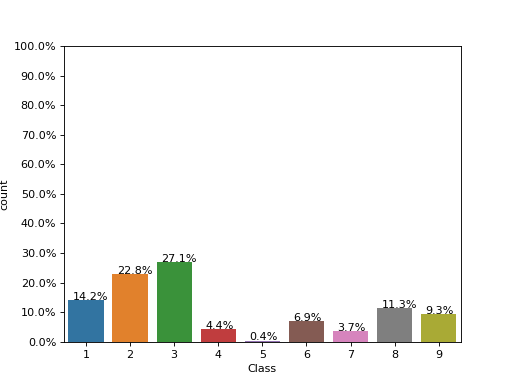

In [9]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [10]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  5.012695      9
1  01IsoiSMh5gxyDYTl4CB  6.556152      2
2  01jsnpXSAlgw6aPeDxrU  4.602051      9
3  01kcPWA9K2BOxQeS5Rju  0.679688      1
4  01SuzwMJEIXsK7A8dQbl  0.438965      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


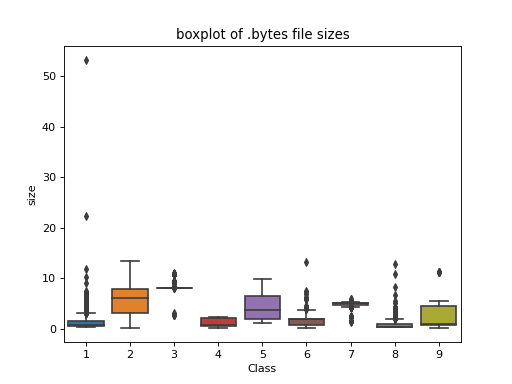

In [11]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [20]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000
files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()
print("DONE")
files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
l=1
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
       
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    print(l)
    l=l+1
    k += 1

byte_feature_file.close()

DONE
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276

1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059


3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698


5138
5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337


6777
6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976


8416
8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615


10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
1021

In [21]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [22]:
data_size_byte.head(2)

ID      size  Class
0  01azqd4InC7m9JpocGv5  5.012695      9
1  01IsoiSMh5gxyDYTl4CB  6.556152      2

In [23]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824  5.012695   
1  9291  ...   439   281   302  7639   518  17001  54902  8588  6.556152   

   Class  
0      9  
1      2  

[2 rows x 260 columns]

In [24]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [25]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  

[2 rows x 260 columns]

In [26]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


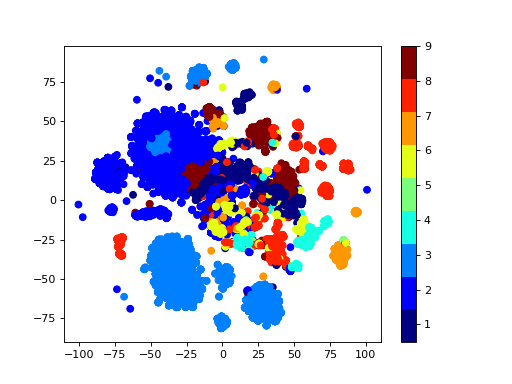

In [27]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


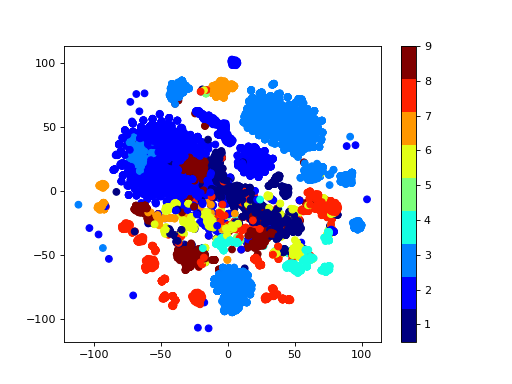

In [28]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [29]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [30]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


In [32]:
print(y_train)

8567     4
7205     2
463      8
3796     9
8454     6
        ..
4082     3
10807    7
3699     9
187      3
1550     6
Name: Class, Length: 6955, dtype: int64


<IPython.core.display.Javascript object>


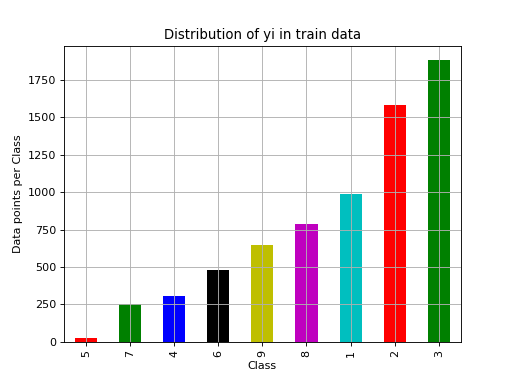

Number of data points in class 9 : 1883 ( 27.074 %)
Number of data points in class 8 : 1586 ( 22.804 %)
Number of data points in class 7 : 986 ( 14.177 %)
Number of data points in class 6 : 786 ( 11.301 %)
Number of data points in class 5 : 648 ( 9.317 %)
Number of data points in class 4 : 481 ( 6.916 %)
Number of data points in class 3 : 304 ( 4.371 %)
Number of data points in class 2 : 254 ( 3.652 %)
Number of data points in class 1 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


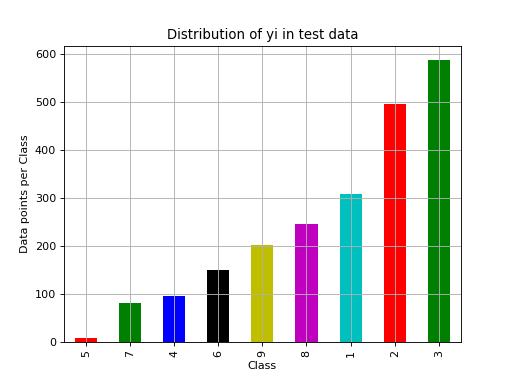

Number of data points in class 9 : 588 ( 27.047 %)
Number of data points in class 8 : 496 ( 22.815 %)
Number of data points in class 7 : 308 ( 14.167 %)
Number of data points in class 6 : 246 ( 11.316 %)
Number of data points in class 5 : 203 ( 9.338 %)
Number of data points in class 4 : 150 ( 6.9 %)
Number of data points in class 3 : 95 ( 4.37 %)
Number of data points in class 2 : 80 ( 3.68 %)
Number of data points in class 1 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


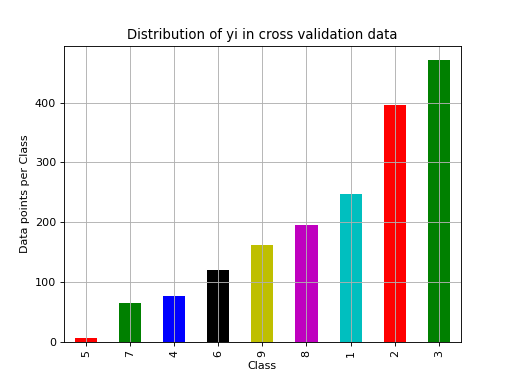

Number of data points in class 9 : 471 ( 27.085 %)
Number of data points in class 8 : 396 ( 22.772 %)
Number of data points in class 7 : 247 ( 14.204 %)
Number of data points in class 6 : 196 ( 11.271 %)
Number of data points in class 5 : 162 ( 9.316 %)
Number of data points in class 4 : 120 ( 6.901 %)
Number of data points in class 3 : 76 ( 4.37 %)
Number of data points in class 2 : 64 ( 3.68 %)
Number of data points in class 1 : 7 ( 0.403 %)


In [35]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_values()
test_class_distribution = y_test.value_counts().sort_values()
cv_class_distribution = y_cv.value_counts().sort_values()

my_colors = ['r','g','b','k','y','m','c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [36]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.474041939186419
Log loss on Test Data using Random Model 2.48100192006732
Number of misclassified points  88.27046918123274
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


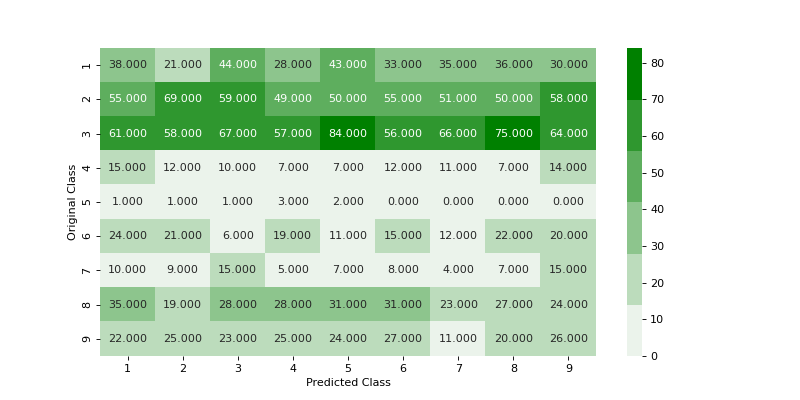

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


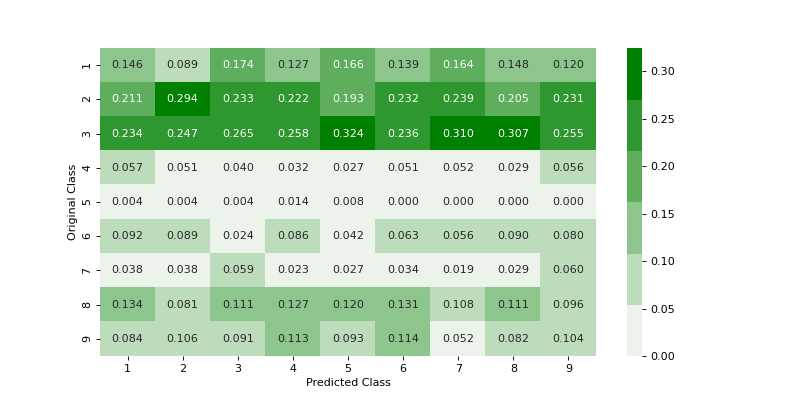

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


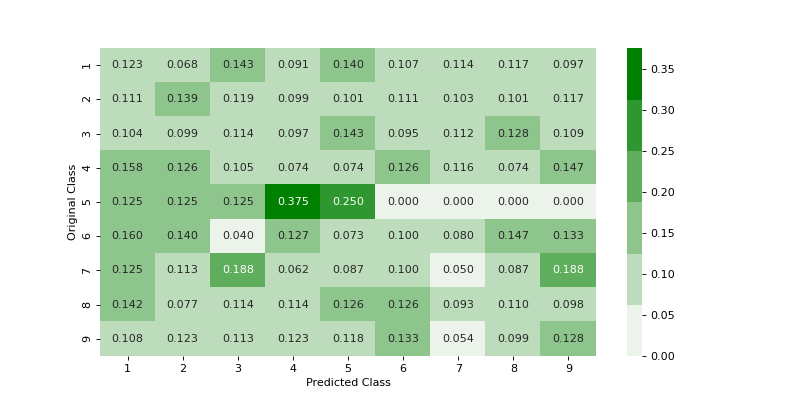

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [37]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 0.2541542148314975
log_loss for k =  3 is 0.24477020032506022
log_loss for k =  5 is 0.2606024604073821
log_loss for k =  7 is 0.2775699996238368
log_loss for k =  9 is 0.29031904499147465
log_loss for k =  11 is 0.3039448675065363
log_loss for k =  13 is 0.3154978143778505


<IPython.core.display.Javascript object>


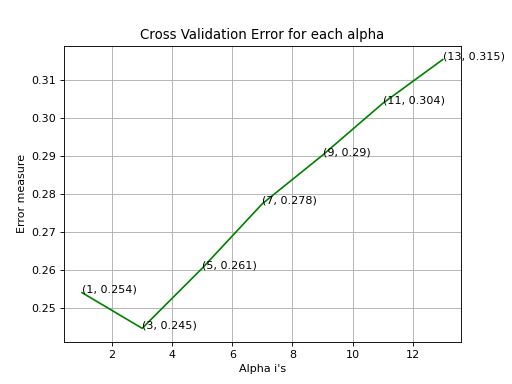

For values of best alpha =  3 The train log loss is: 0.1093335864176261
For values of best alpha =  3 The cross validation log loss is: 0.24477020032506022
For values of best alpha =  3 The test log loss is: 0.2234541529409949
Number of misclassified points  5.427782888684453
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


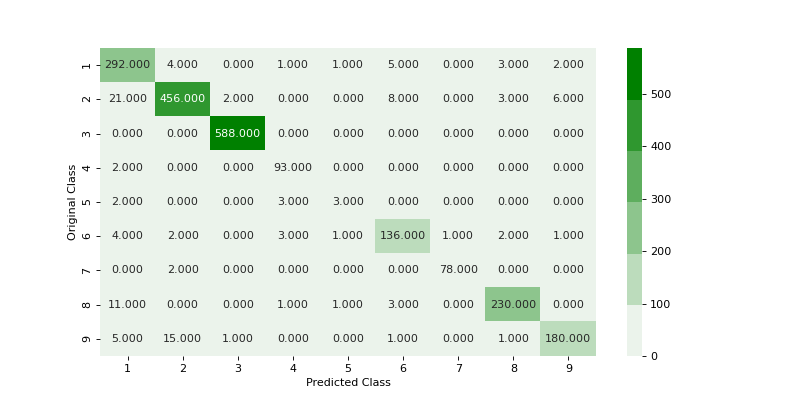

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


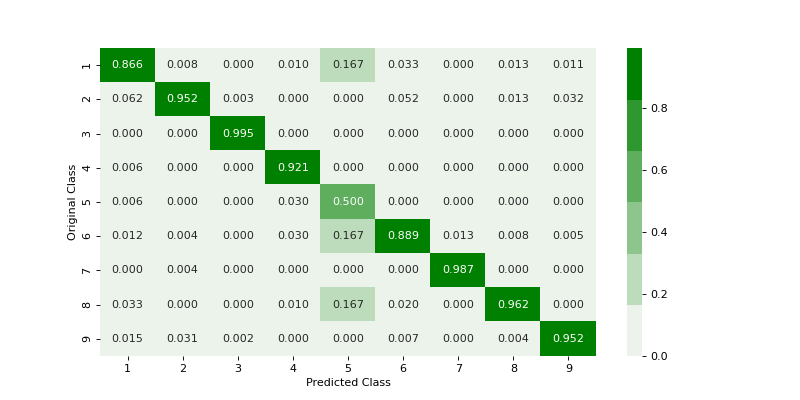

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


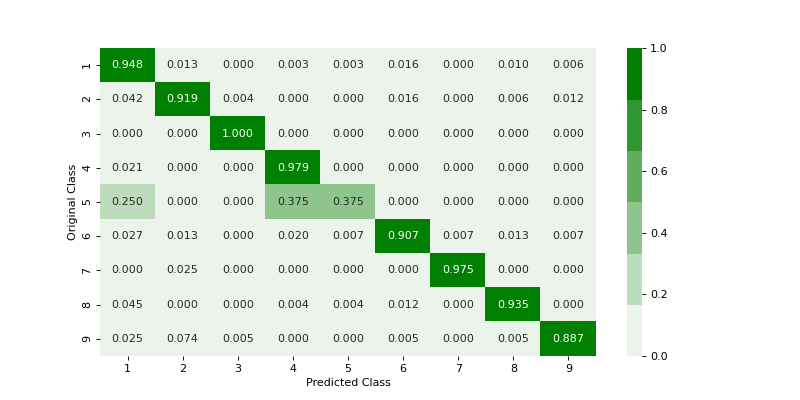

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [38]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.1848555800983718
log_loss for c =  0.0001 is 1.1848278316900955
log_loss for c =  0.001 is 1.181720461658419
log_loss for c =  0.01 is 1.1565611692975801
log_loss for c =  0.1 is 1.059450540424399
log_loss for c =  1 is 0.9954306107027544
log_loss for c =  10 is 0.9092447605150811
log_loss for c =  100 is 0.8580904788307249
log_loss for c =  1000 is 0.8706711239854745


<IPython.core.display.Javascript object>


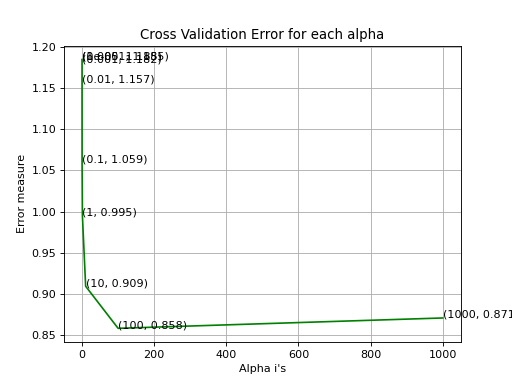

log loss for train data 0.8491236704384987
log loss for cv data 0.8580904788307249
log loss for test data 0.8586378615979048
Number of misclassified points  27.96688132474701
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


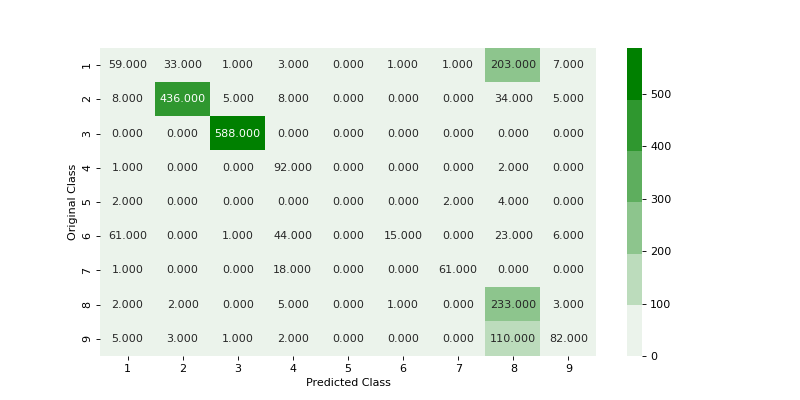

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


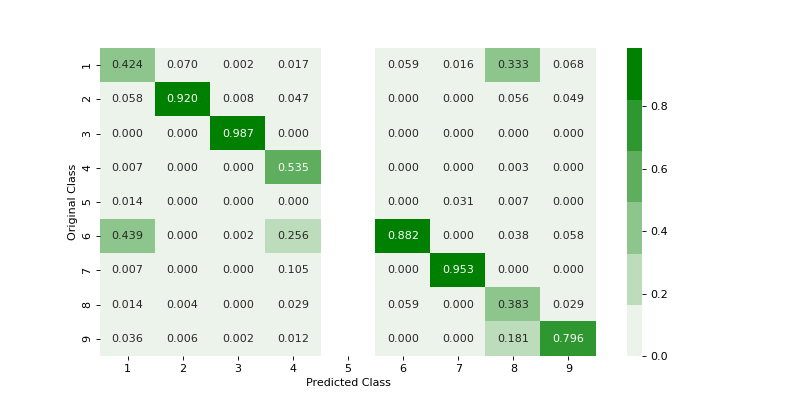

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


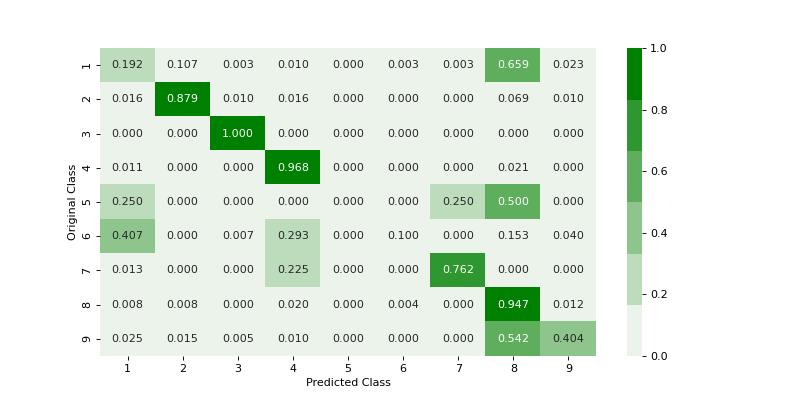

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [39]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier </h3>

log_loss for c =  10 is 0.09575566881347355
log_loss for c =  50 is 0.08501020739757541
log_loss for c =  100 is 0.08336008874710955
log_loss for c =  500 is 0.08429370255245407
log_loss for c =  1000 is 0.08411836785021538
log_loss for c =  2000 is 0.08431589930975415
log_loss for c =  3000 is 0.0843172920651055


<IPython.core.display.Javascript object>


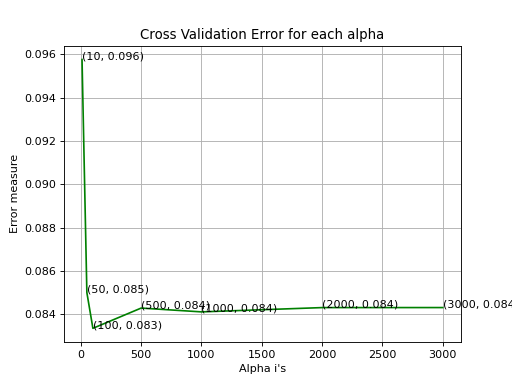

For values of best alpha =  100 The train log loss is: 0.025467593527792372
For values of best alpha =  100 The cross validation log loss is: 0.08336008874710955
For values of best alpha =  100 The test log loss is: 0.08760196408672152
Number of misclassified points  2.0699172033118676
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


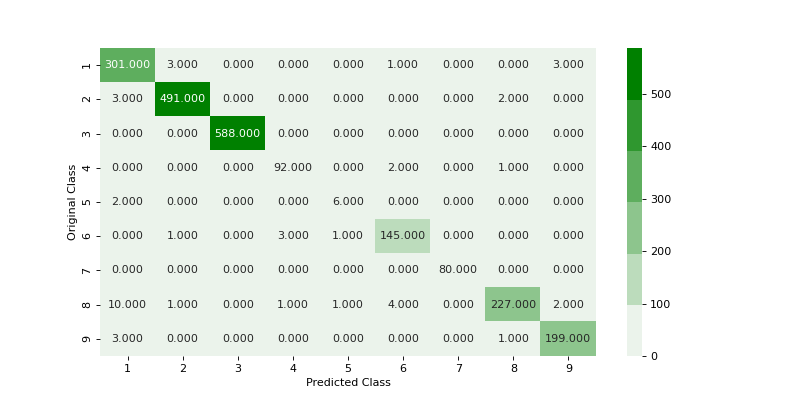

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


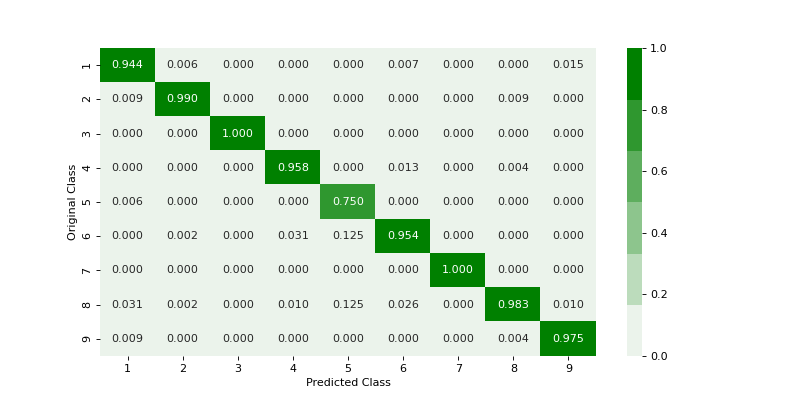

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


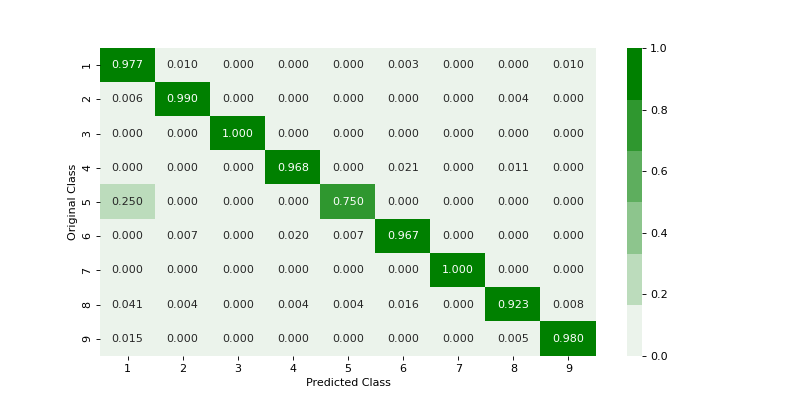

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [40]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification</h3>

[22:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


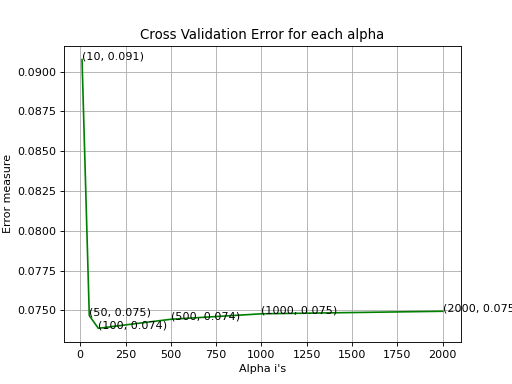

[23:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


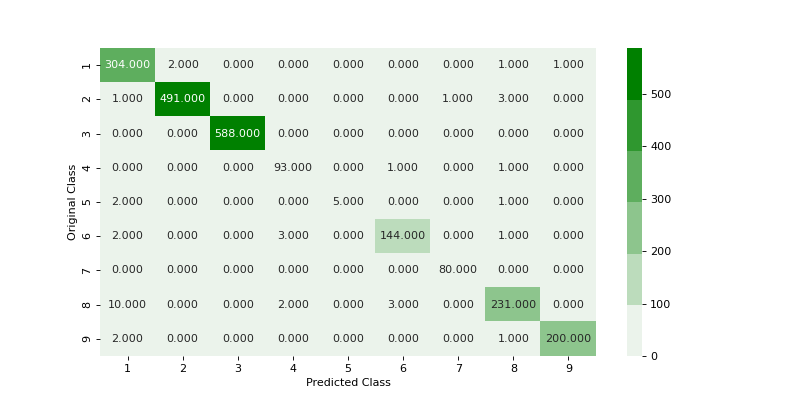

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


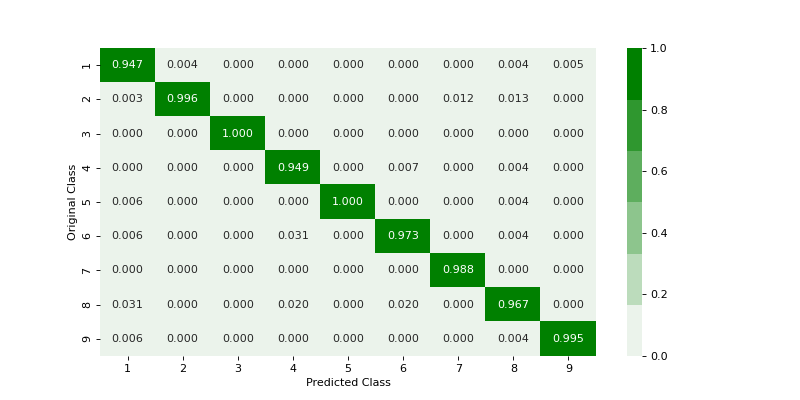

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


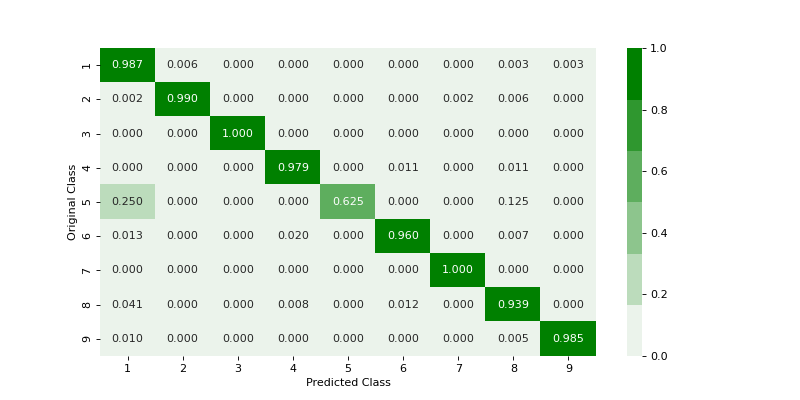

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [41]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [42]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[23:32:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [43]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.5}


In [44]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=100, learning_rate=0.15, colsample_bytree=0.5, max_depth=5)
x_cfl.fit(X_train,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

[23:34:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#third
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
#ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('third')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('third/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [45]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [46]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

                     ID       size  Class
0  01azqd4InC7m9JpocGv5  56.229886      9
1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4  01SuzwMJEIXsK7A8dQbl   0.996723      8


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

<IPython.core.display.Javascript object>


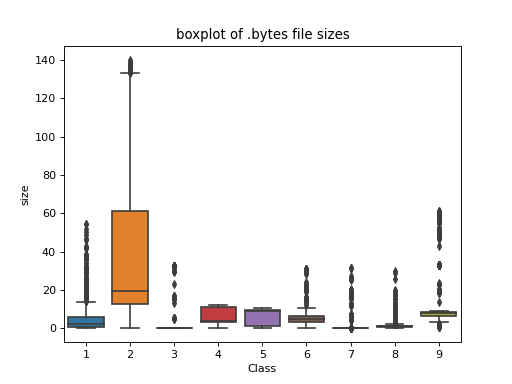

In [47]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [48]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class      size  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [49]:
# we normalize the data each column 
result_asm = normalize(result_asm)
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


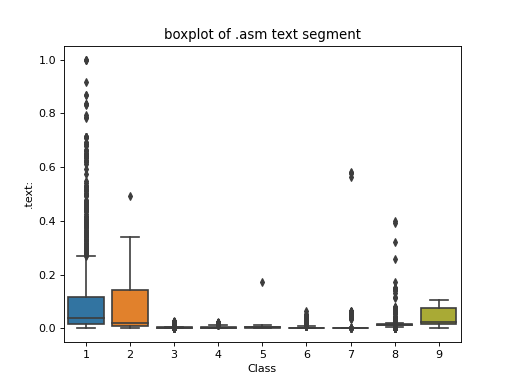

In [50]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


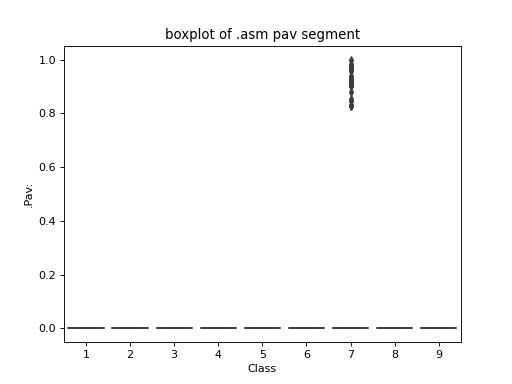

In [51]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


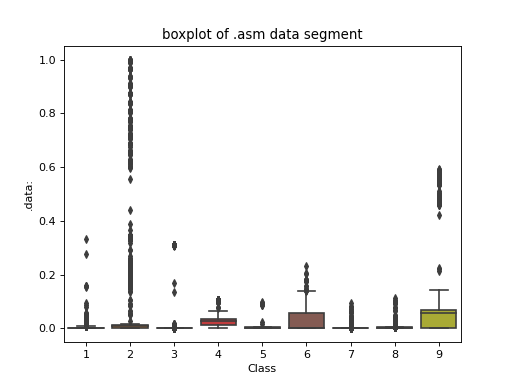

In [52]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


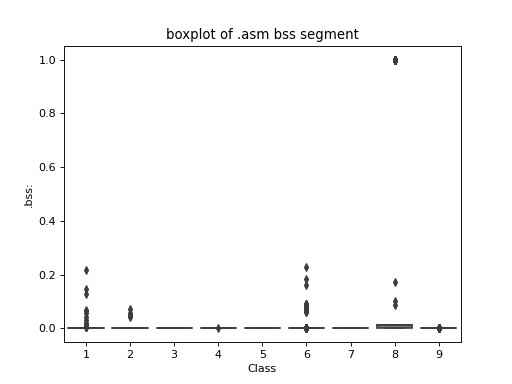

In [53]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


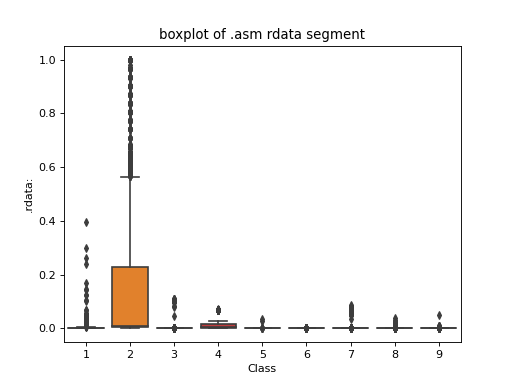

In [54]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


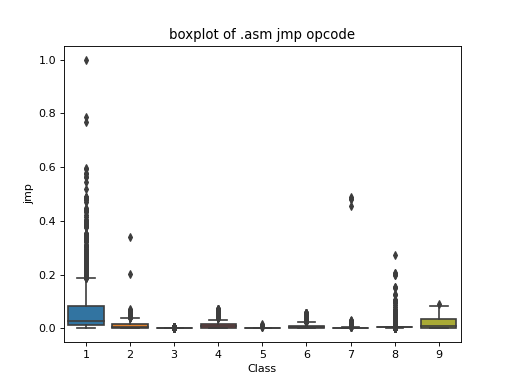

In [55]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


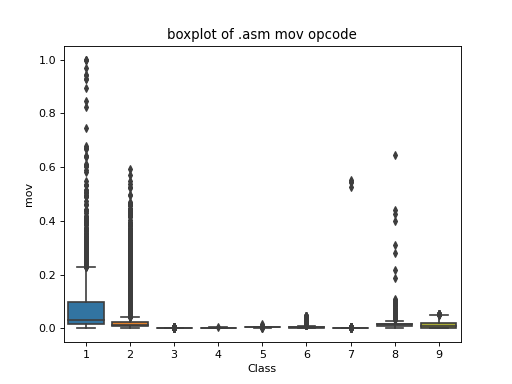

In [56]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


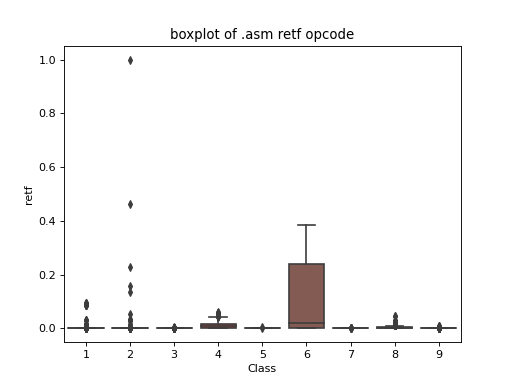

In [57]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


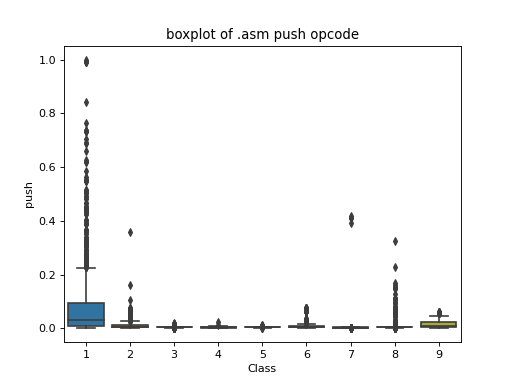

In [58]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

<IPython.core.display.Javascript object>


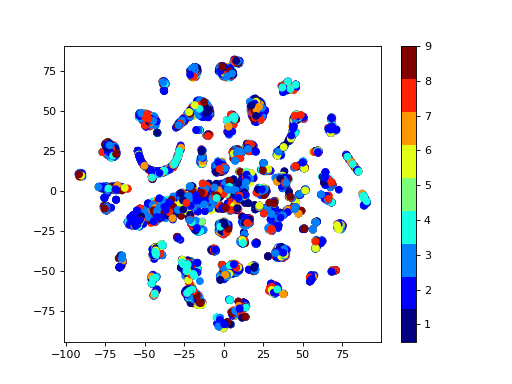

In [59]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


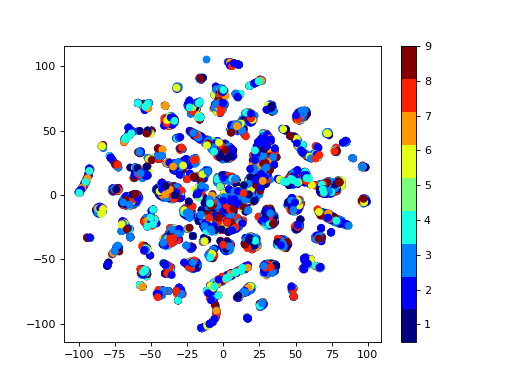

In [60]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [61]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [62]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [63]:
print( X_cv_asm.isnull().all())

HEADER:    False
.text:     False
.Pav:      False
.idata:    False
.data:     False
.bss:      False
.rdata:    False
.edata:    False
.rsrc:     False
.tls:      False
.reloc:    False
jmp        False
mov        False
retf       False
push       False
pop        False
xor        False
retn       False
nop        False
sub        False
inc        False
dec        False
add        False
imul       False
xchg       False
or         False
shr        False
cmp        False
call       False
shl        False
ror        False
rol        False
jnb        False
jz         False
lea        False
movzx      False
.dll       False
std::      False
:dword     False
edx        False
esi        False
eax        False
ebx        False
ecx        False
edi        False
ebp        False
esp        False
eip        False
size       False
dtype: bool


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>

log_loss for k =  1 is 0.09219308294459093
log_loss for k =  3 is 0.10214832983500556
log_loss for k =  5 is 0.1251336474102744
log_loss for k =  7 is 0.1396895425670157
log_loss for k =  9 is 0.15086906343738785
log_loss for k =  11 is 0.15836494939019663
log_loss for k =  13 is 0.16544207404350073
log_loss for k =  15 is 0.1720010806444432
log_loss for k =  17 is 0.1778389283111659
log_loss for k =  19 is 0.1841906543381678


<IPython.core.display.Javascript object>


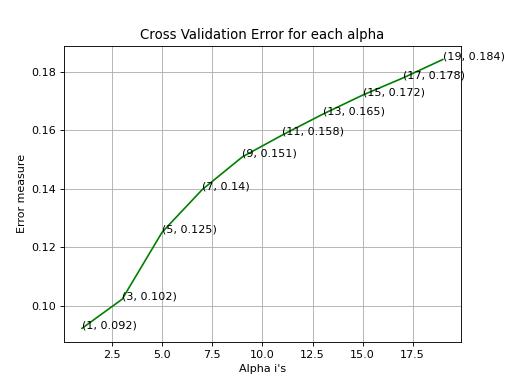

log loss for train data 0.02329969602950791
log loss for cv data 0.09219308294459093
log loss for test data 0.10109675854849617
Number of misclassified points  1.609935602575897
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


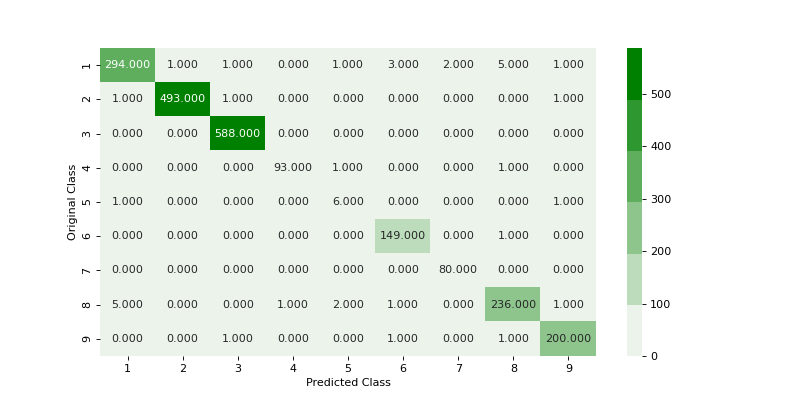

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


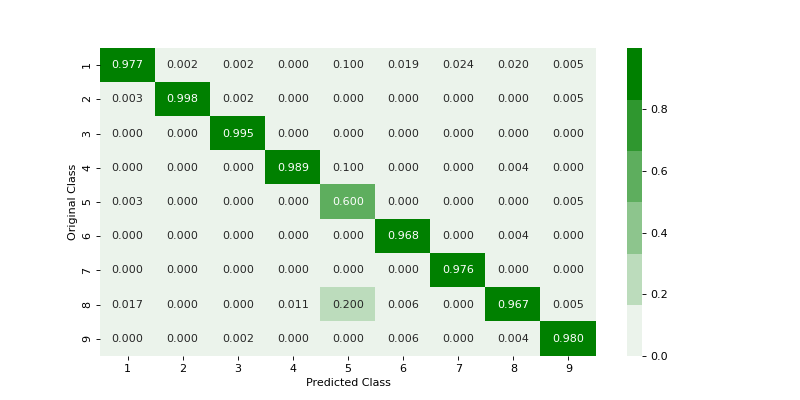

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


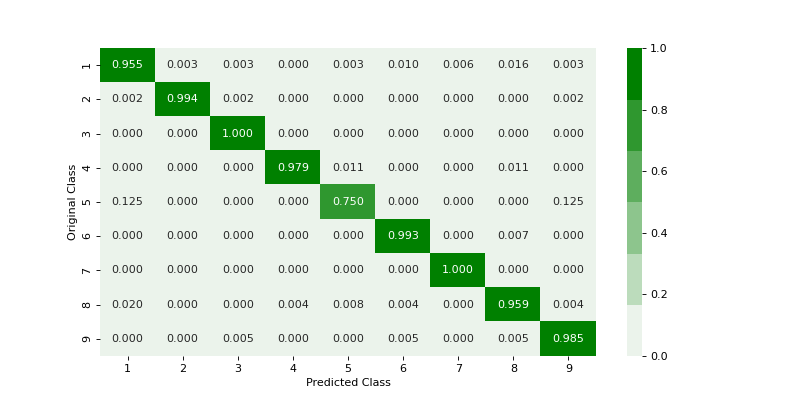

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [64]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.2 Logistic Regression </h3>

log_loss for c =  1e-05 is 1.2960600477437536
log_loss for c =  0.0001 is 1.295811172458205
log_loss for c =  0.001 is 1.2929602974112917
log_loss for c =  0.01 is 1.2566962384762352
log_loss for c =  0.1 is 1.0119153584963965
log_loss for c =  1 is 1.19942392328713
log_loss for c =  10 is 1.2631902014697467
log_loss for c =  100 is 1.2020370537850082
log_loss for c =  1000 is 1.1908759451055093


<IPython.core.display.Javascript object>


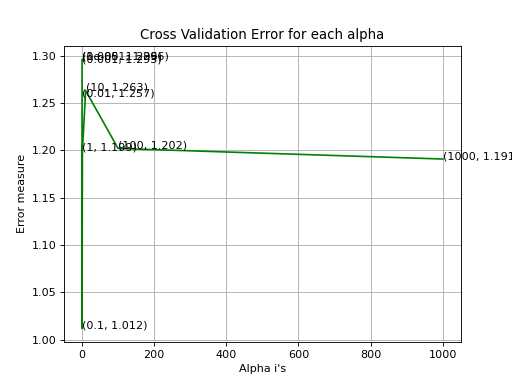

log loss for train data 0.9917760829315142
log loss for cv data 1.0119153584963965
log loss for test data 0.9978990380721926
Number of misclassified points  28.748850045998157
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


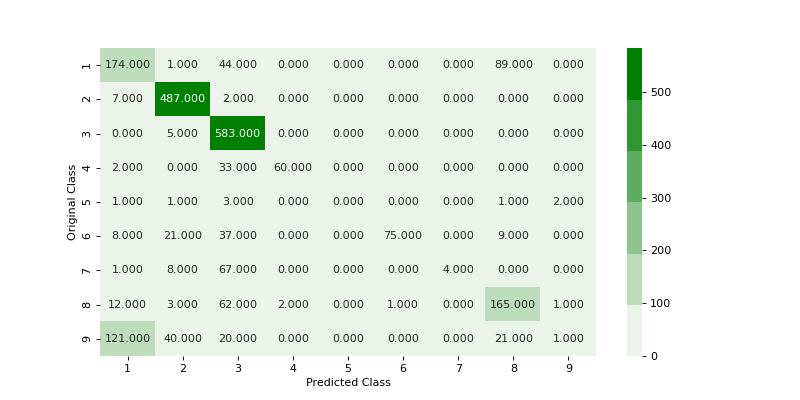

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


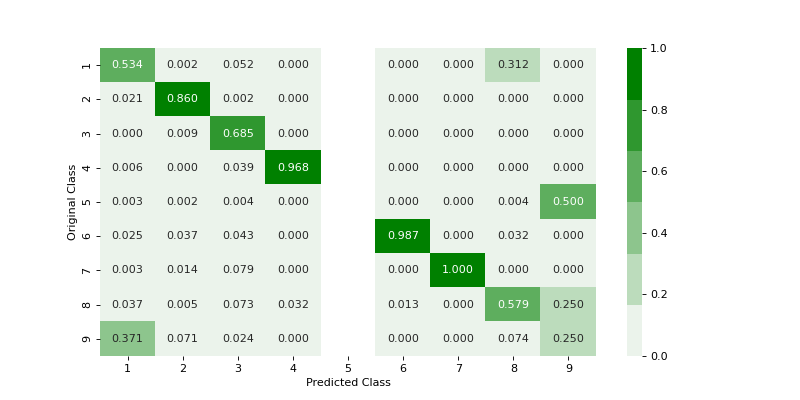

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


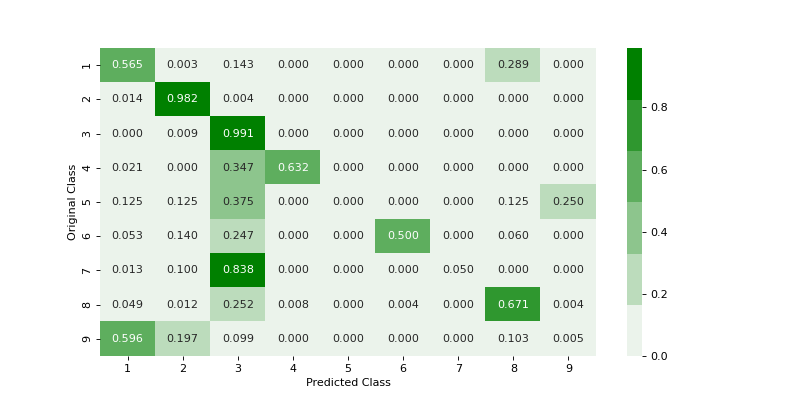

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [65]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.3 Random Forest Classifier</h3>

log_loss for c =  10 is 0.04320807151789409
log_loss for c =  50 is 0.040112296000987535
log_loss for c =  100 is 0.039203471318048244
log_loss for c =  500 is 0.03995601633247665
log_loss for c =  1000 is 0.04007095190098654
log_loss for c =  2000 is 0.04020795363255623
log_loss for c =  3000 is 0.04020168557749387


<IPython.core.display.Javascript object>


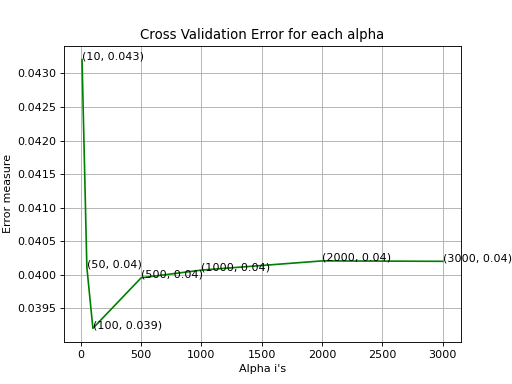

log loss for train data 0.015704132370753653
log loss for cv data 0.039203471318048244
log loss for test data 0.034135629179630436
Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


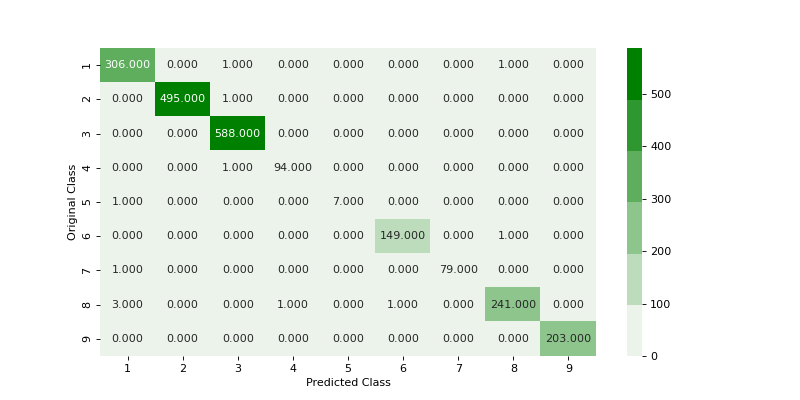

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


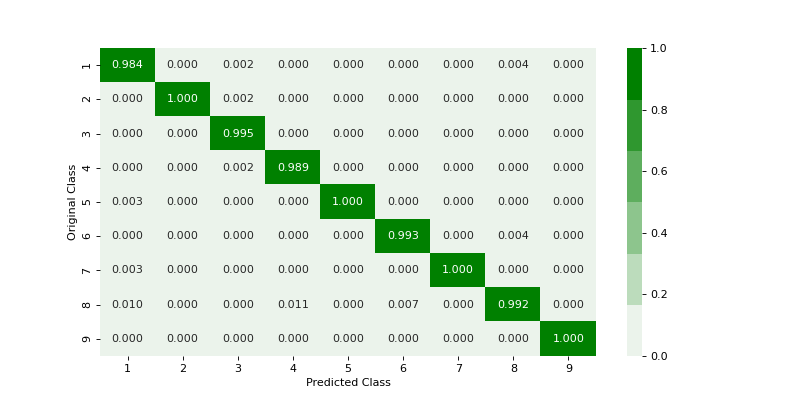

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


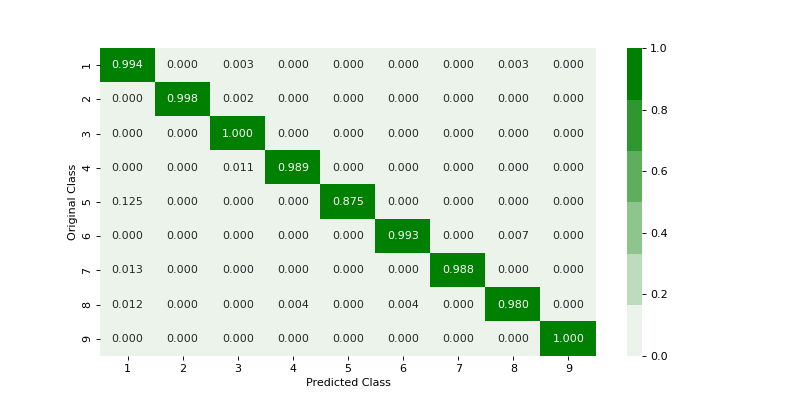

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [66]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.4 XgBoost Classifier</h3>

[23:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:59:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[00:01:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:02:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


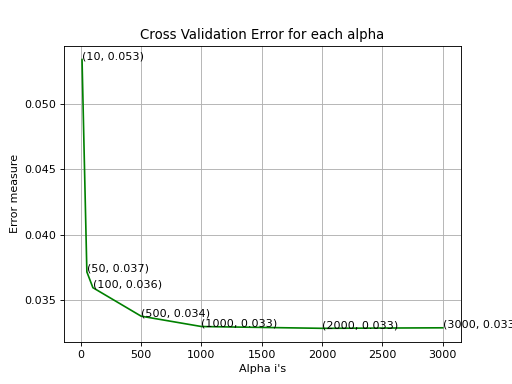

[00:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


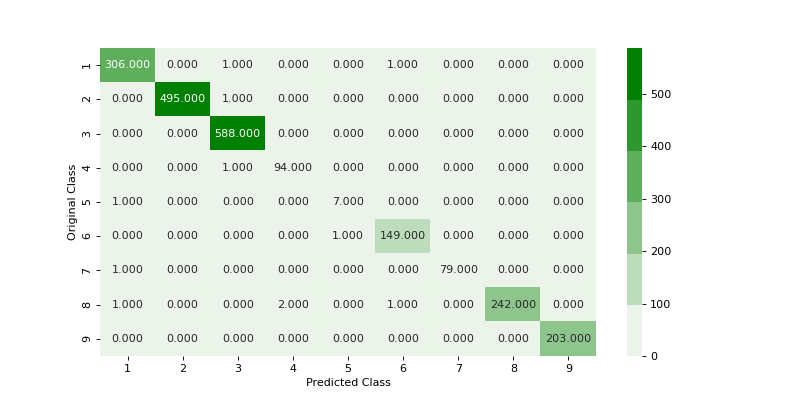

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


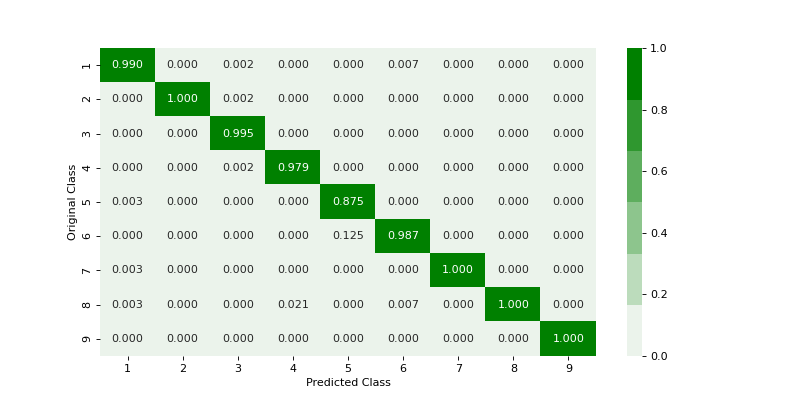

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


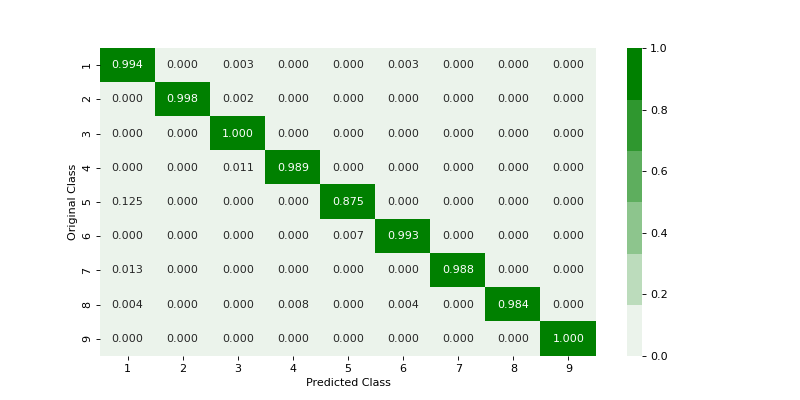

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [67]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1)
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [68]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[00:12:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [69]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.3}


In [70]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=1,learning_rate=0.03,colsample_bytree=0.3,max_depth=3)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))

[00:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:14:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:15:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [71]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [72]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class      size  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [73]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [74]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip    size_y  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


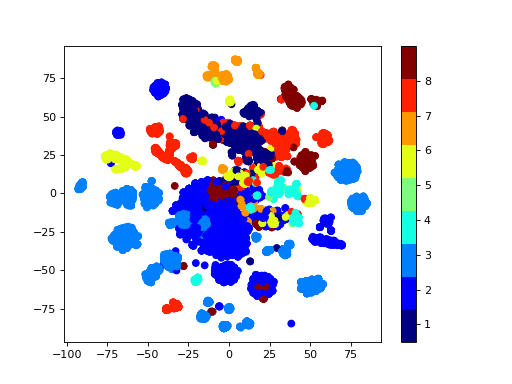

In [77]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

In [78]:
result_x.shape

(10868, 307)

<h3> 4.5.3. Train and Test split</h3>

In [79]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>

log_loss for c =  10 is 0.04688815049467725
log_loss for c =  50 is 0.03889019336921362
log_loss for c =  100 is 0.03820080610581546
log_loss for c =  500 is 0.0376068396752813
log_loss for c =  1000 is 0.037841158455120774
log_loss for c =  2000 is 0.03773804158847676
log_loss for c =  3000 is 0.03773404608886712


<IPython.core.display.Javascript object>


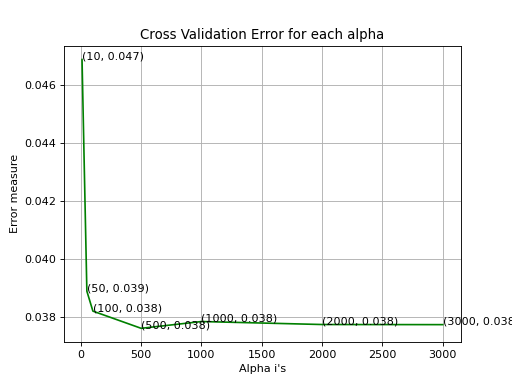

For values of best alpha =  500 The train log loss is: 0.016174001625008646
For values of best alpha =  500 The cross validation log loss is: 0.0376068396752813
For values of best alpha =  500 The test log loss is: 0.05239410838012635


In [80]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

[00:30:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[00:38:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:39:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


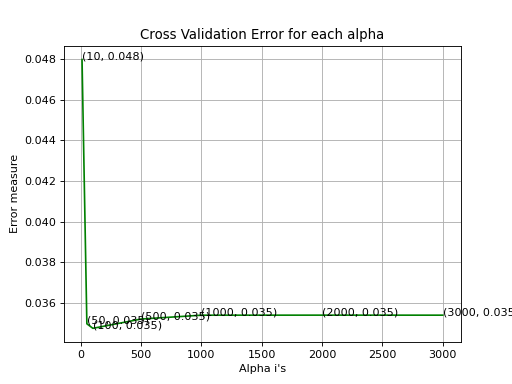

[00:53:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:54:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [81]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [82]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[01:14:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [83]:
print (random_cfl.best_params_)

{'subsample': 1, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1}


[01:38:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

<IPython.core.display.Javascript object>


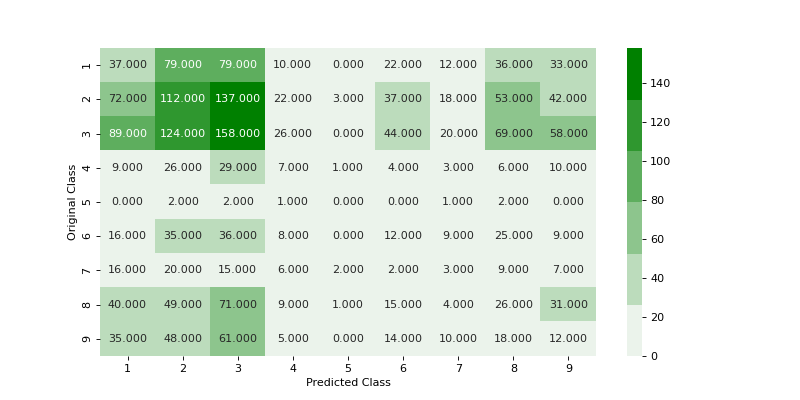

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


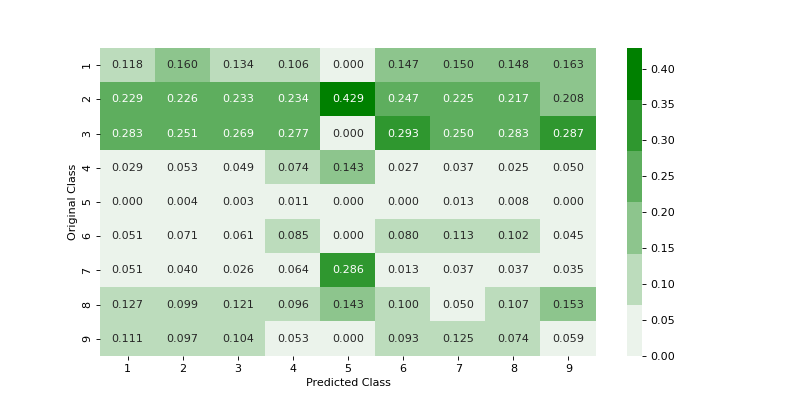

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


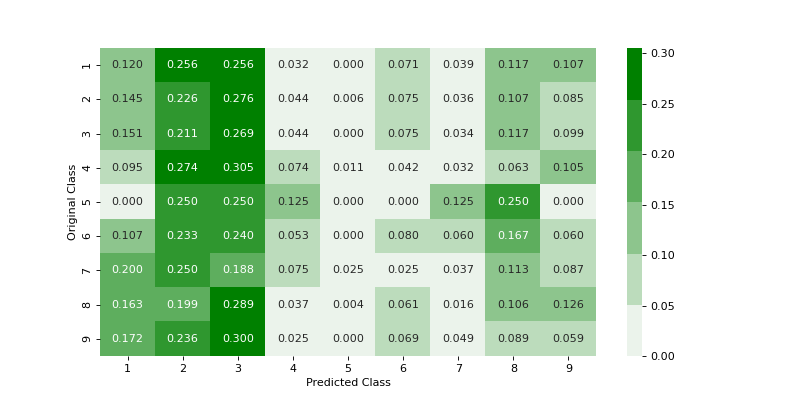

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [84]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.05,colsample_bytree=1,subsample=1,nthread=-1)
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    
predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_merge))

<h1> 5. Assignments </h1>

<ol>
<li> Add bi-grams on byte files and improve the log-loss</li>
<li> Watch the video (<a href='https://www.youtube.com/watch?v=VLQTRlLGz5Y#t=13m11s'>video</a>) and include pixel intensity features to improve the logloss </li>
</ol>

<pre>
1. you need to donwload the train from kaggle, which is of size ~17GB, after extracting it will occupy ~128GB data your dirve

2. if you are having computation power limitations, you can try using google colab, with GPU option enabled (you can search for how to enable GPU in colab) or you can work with the Google Cloud, check this tutorials by one of our student: https://www.youtube.com/channel/UCRH_z-oM0LROvHPe_KYR4Wg (we suggest you to use GCP over Colab)

3. To Extract the .7z file in google cloud, once after you upload the file into server, in your ipython notebook create a new cell and write thess commands
  a. !sudo apt-get install p7zip
  b. !7z x file_name.7z -o path/where/you/want/to/extract
  
https://askubuntu.com/a/341637
</pre>

In [85]:
result_x['ID'] = result.ID

In [87]:
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       esi       eax       ebx       ecx  \
0  0.002946  0.002638  0.003531  ...  0.025875  0.025744  0.004910  0.008930   
1  0.006984  0.008267  0.000394  ...  0.012316  0.007858  0.007570  0.005350   
2  0.002155  0.008104  0.002707  ...  0.006181  0.000100  0.003773  0.000713   
3  0.000481  0.000959  0.000521  ...  0.000746  0.000301  0.000360  0.001057   
4  0.000229  0.000376  0.000246  ...  0.013875  0.000482  0.012932  0.001363   

   edi       ebp       esp       eip    size_y                    ID  
0  0.0  0.027174  0.000428  0.049896  0.400910  01azqd4InC7m9JpocGv5  
1  0.0  0.043478  0.000673  0.024839  0.099719  01IsoiSMh5gxyDYTl4CB  
2  0.0  0.048913  0.000000  0.012802  0.060553  01jsnpXSAlgw6aPeDxrU  
3  0.0  0.030797  0.001468  0.003173  0.000432  01kcPWA9K2BOxQeS5Rju  
4  0.0  0.027174  0.000000  0.008316  0.006983  01SuzwMJEIXsK7A8dQbl  

[5 rows x 308 columns]

# Adding Bigram on byte files.

In [89]:
byte_vocabulary= "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"
print(len(byte_vocabulary.split(',')))

257


In [100]:
def bigram():
    byte_bigram_vocabulary = []
    for i, j in enumerate(byte_vocabulary.split(',')):
        for k in range(0, len(byte_vocabulary.split(','))):
            byte_bigram_vocabulary.append(j + ' ' +byte_vocabulary.split(',')[k])
    print(len(byte_bigram_vocabulary))
    return byte_bigram_vocabulary

In [101]:
bb=bigram()

66049


In [102]:
bb

['00 00',
 '00 01',
 '00 02',
 '00 03',
 '00 04',
 '00 05',
 '00 06',
 '00 07',
 '00 08',
 '00 09',
 '00 0a',
 '00 0b',
 '00 0c',
 '00 0d',
 '00 0e',
 '00 0f',
 '00 10',
 '00 11',
 '00 12',
 '00 13',
 '00 14',
 '00 15',
 '00 16',
 '00 17',
 '00 18',
 '00 19',
 '00 1a',
 '00 1b',
 '00 1c',
 '00 1d',
 '00 1e',
 '00 1f',
 '00 20',
 '00 21',
 '00 22',
 '00 23',
 '00 24',
 '00 25',
 '00 26',
 '00 27',
 '00 28',
 '00 29',
 '00 2a',
 '00 2b',
 '00 2c',
 '00 2d',
 '00 2e',
 '00 2f',
 '00 30',
 '00 31',
 '00 32',
 '00 33',
 '00 34',
 '00 35',
 '00 36',
 '00 37',
 '00 38',
 '00 39',
 '00 3a',
 '00 3b',
 '00 3c',
 '00 3d',
 '00 3e',
 '00 3f',
 '00 40',
 '00 41',
 '00 42',
 '00 43',
 '00 44',
 '00 45',
 '00 46',
 '00 47',
 '00 48',
 '00 49',
 '00 4a',
 '00 4b',
 '00 4c',
 '00 4d',
 '00 4e',
 '00 4f',
 '00 50',
 '00 51',
 '00 52',
 '00 53',
 '00 54',
 '00 55',
 '00 56',
 '00 57',
 '00 58',
 '00 59',
 '00 5a',
 '00 5b',
 '00 5c',
 '00 5d',
 '00 5e',
 '00 5f',
 '00 60',
 '00 61',
 '00 62',
 '00 63',


In [106]:
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer
import scipy as sp

vector = CountVectorizer(lowercase=False,ngram_range=(2,2), vocabulary=bb)
bytebigram_vector = sp.sparse.csr_matrix((10868, 66049))
for i, file in tqdm(enumerate(os.listdir('byteFiles'))):
    f = open('byteFiles/' + file)
    a[i:]+= sp.sparse.csr_matrix(vector.fit_transform([f.read().replace('\n', ' ').lower()]))
    f.close()

10868it [3:54:18,  1.29s/it]


In [109]:
sp.sparse.save_npz('bytebigram.npz', bytebigram_vector)

In [111]:
from sklearn.preprocessing import normalize
byte_bigram_vector = normalize(sp.sparse.load_npz('bytebigram.npz'), axis = 0)

In [113]:
def imp_features(data, features, keep):
    rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
    rf.fit(data, result_y)
    imp_feature_indx = np.argsort(rf.feature_importances_)[::-1]
    imp_value = np.take(rf.feature_importances_, imp_feature_indx[:20])
    imp_feature_name = np.take(features, imp_feature_indx[:20])
    sns.set()
    plt.figure(figsize = (10, 5))
    ax = sns.barplot(x = imp_feature_name, y = imp_value)
    ax.set_xticklabels(labels = imp_feature_name, rotation = 45)
    sns.set_palette(reversed(sns.color_palette("husl", 10)), 10)
    plt.title('Important Features')
    plt.xlabel('Feature Names')
    plt.ylabel('Importance')
    return imp_feature_indx[:keep]

In [115]:
byte_bigram_indexes = imp_features(normalize(bytebigram_vector, axis = 0), bb, 500)
np.save('byte_bigram_index', byte_bigram_indexes)
byte_bigram_indexes = np.load('byte_bigram_index.npy')

In [120]:
top_byte_bigrams = np.zeros((10868, 0))
for i in byte_bigram_indexes:
    sliced = bytebigram_vector[:, i].todense()
    top_byte_bigrams = np.hstack([top_byte_bigrams, sliced])
    
print(len(top_byte_bigrams))

10868


In [124]:
from scipy import sparse
top_byte_bigrams=sparse.csr_matrix(top_byte_bigrams)
top_byte_bigrams

<10868x500 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [125]:
byte_bigram_df=pd.DataFrame.sparse.from_spmatrix(top_byte_bigrams,columns = np.take(bb,byte_bigram_indexes))

In [127]:
byte_bigram_df.to_csv('byte_bigram.csv')
byte_bigram_df = pd.read_csv('byte_bigram.csv').drop('Unnamed: 0', axis = 1).fillna(0)
byte_bigram_df['ID'] = result.ID
byte_bigram_df.head()

?? ??  55 95  55 b3  55 b2  55 b1  55 b0  55 af  55 ae  55 ad  55 ac  ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   
1      0      0      0      0      0      0      0      0      0      0  ...   
2      0      0      0      0      0      0      0      0      0      0  ...   
3      0      0      0      0      0      0      0      0      0      0  ...   
4      0      0      0      0      0      0      0      0      0      0  ...   

   55 0c  55 0b  55 0a  55 09  55 08  55 07  55 06  55 05  55 04  \
0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0   

                     ID  
0  01azqd4InC7m9JpocGv5  
1  01IsoiSMh5gxyDYTl4CB  
2  01jsnpXSAlgw6aPeDxrU  
3  01kcPWA9K2BOxQeS5Rju  
4  01SuzwMJEIXsK7A8dQbl  

[5 rows x 501 columns]

# Pixel Intensity Features fron .asm files

In [132]:
import array
import imageio

In [145]:
def image_asm():
    i=1
    for asmfile in os.listdir("asmFiles"):
        filename = asmfile.split('.')[0]
        file = codecs.open("asmFiles/" + asmfile, 'rb')
        filelen = os.path.getsize("asmFiles/" + asmfile)
        width = int(filelen ** 0.5)
        rem = int(filelen / width)
        arr = array.array('B')
        arr.frombytes(file.read())
        file.close()
        print(i)
        i=i+1
        reshaped = np.reshape(arr[:width * width], (width, width))
        reshaped = np.uint8(reshaped)
        imageio.imwrite('asm_imagess/' + filename + '.png',reshaped)

In [146]:
dest='asm_imagess'
os.makedirs(dest)
image_asm()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
1021

In [147]:
import cv2
imagefeatures = np.zeros((10868, 200))

In [149]:
k=1
for i, asmfile in enumerate(os.listdir("asmFiles")):
    image = cv2.imread("asm_imagess/" + asmfile.split('.')[0] + '.png')
    image_array = image.flatten()[:200]
    print(k)
    k=k+1
    imagefeatures[i, :] += image_array

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700


5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340


6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979


8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618


10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
1021

In [158]:
imgfeatures_name = []
for i in range(200):
    imgfeatures_name.append('pixel' + str(i))
image_df = pd.DataFrame(normalize(imagefeatures, axis = 0), columns = imgfeatures_name)

In [159]:
image_df['ID'] = result.ID

In [160]:
image_df.head()

pixel0    pixel1    pixel2    pixel3    pixel4    pixel5    pixel6  \
0  0.019020  0.019020  0.019020  0.014863  0.014863  0.014863  0.015396   
1  0.012152  0.012152  0.012152  0.024988  0.024988  0.024988  0.023923   
2  0.019020  0.019020  0.019020  0.014863  0.014863  0.014863  0.015396   
3  0.019020  0.019020  0.019020  0.014863  0.014863  0.014863  0.015396   
4  0.019020  0.019020  0.019020  0.014863  0.014863  0.014863  0.015396   

     pixel7    pixel8    pixel9  ...  pixel191  pixel192  pixel193  pixel194  \
0  0.015396  0.015396  0.014643  ...  0.017767  0.017767  0.017767  0.017767   
1  0.023923  0.023923  0.025841  ...  0.017767  0.017767  0.017767  0.017767   
2  0.015396  0.015396  0.014643  ...  0.017767  0.017767  0.017767  0.017767   
3  0.015396  0.015396  0.014643  ...  0.017767  0.017767  0.017767  0.017767   
4  0.015396  0.015396  0.014643  ...  0.017767  0.017767  0.017767  0.017767   

   pixel195  pixel196  pixel197  pixel198  pixel199                    ID  
0  0.017767  0.017767  0.017767  0.017767  0.017767  01azqd4InC7m9JpocGv5  
1  0.017767  0.017767  0.017767  0.017767  0.017767  01IsoiSMh5gxyDYTl4CB  
2  0.017767  0.017767  0.017767  0.017767  0.017767  01jsnpXSAlgw6aPeDxrU  
3  0.017767  0.017767  0.017767  0.017767  0.017767  01kcPWA9K2BOxQeS5Rju  
4  0.017767  0.017767  0.017767  0.017767  0.017767  01SuzwMJEIXsK7A8dQbl  

[5 rows x 201 columns]

In [163]:
final_df = pd.concat([result_x,byte_bigram_df,image_df], axis = 1, join = 'inner')
final_df = final_df.drop('ID', axis = 1)
final_df.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...  pixel190  pixel191  pixel192  pixel193  \
0  0.002946  0.002638  0.003531  ...  0.017767  0.017767  0.017767  0.017767   
1  0.006984  0.008267  0.000394  ...  0.017767  0.017767  0.017767  0.017767   
2  0.002155  0.008104  0.002707  ...  0.017767  0.017767  0.017767  0.017767   
3  0.000481  0.000959  0.000521  ...  0.017767  0.017767  0.017767  0.017767   
4  0.000229  0.000376  0.000246  ...  0.017767  0.017767  0.017767  0.017767   

   pixel194  pixel195  pixel196  pixel197  pixel198  pixel199  
0  0.017767  0.017767  0.017767  0.017767  0.017767  0.017767  
1  0.017767  0.017767  0.017767  0.017767  0.017767  0.017767  
2  0.017767  0.017767  0.017767  0.017767  0.017767  0.017767  
3  0.017767  0.017767  0.017767  0.017767  0.017767  0.017767  
4  0.017767  0.017767  0.017767  0.017767  0.017767  0.017767  

[5 rows x 1007 columns]

In [164]:
x_train_final, x_test_final, y_train_final, y_test_final = train_test_split(final_df, result_y, stratify = result_y, test_size = 0.20)
x_trn_final, x_cv_final, y_trn_final, y_cv_final = train_test_split(x_train_final,y_train_final, stratify = y_train_final, test_size = 0.20)

In [174]:
alpha=[10,100,1000,2000]
depth=[1,3,5,7]
cv_log_error_array=[]

for i in alpha:
    for j in depth:
        x_cfl=XGBClassifier(n_estimators=i,max_depth=j)
        x_cfl.fit(x_trn_final,y_trn_final)
        sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
        sig_clf.fit(x_trn_final, y_trn_final)
        predict_y = sig_clf.predict_proba(x_cv_final)
        cv_log_error_array.append(log_loss(y_cv_final, predict_y, labels=x_cfl.classes_, eps=1e-15))
    

        

[23:21:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:24:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[23:39:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

[00:08:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:10:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

TypeError: object of type 'numpy.float64' has no len()

In [176]:
print(cv_log_error_array)

[0.15384868401369492, 0.05468527058150843, 0.04458984047905496, 0.0429202036109447, 0.03597887946475844, 0.03206569115834903, 0.031202267232659547, 0.032639212240600214, 0.031231798648351464, 0.031146711092576475, 0.03112861901624126, 0.032191646752076045, 0.031017753766640833, 0.03114652433241412, 0.03112814504672222, 0.03219155686577459]


In [180]:
s=0
for i in alpha:
    for j in depth:
        print ('log loss for estimators={} and depth={} is {}'.format(i,j,cv_log_error_array[s]))
        s=s+1

log loss for estimators=10 and depth=1 is 0.15384868401369492
log loss for estimators=10 and depth=3 is 0.05468527058150843
log loss for estimators=10 and depth=5 is 0.04458984047905496
log loss for estimators=10 and depth=7 is 0.0429202036109447
log loss for estimators=100 and depth=1 is 0.03597887946475844
log loss for estimators=100 and depth=3 is 0.03206569115834903
log loss for estimators=100 and depth=5 is 0.031202267232659547
log loss for estimators=100 and depth=7 is 0.032639212240600214
log loss for estimators=1000 and depth=1 is 0.031231798648351464
log loss for estimators=1000 and depth=3 is 0.031146711092576475
log loss for estimators=1000 and depth=5 is 0.03112861901624126
log loss for estimators=1000 and depth=7 is 0.032191646752076045
log loss for estimators=2000 and depth=1 is 0.031017753766640833
log loss for estimators=2000 and depth=3 is 0.03114652433241412
log loss for estimators=2000 and depth=5 is 0.03112814504672222
log loss for estimators=2000 and depth=7 is 0.0

In [182]:
x_cfl=XGBClassifier(n_estimators=1000,max_depth=5,nthread=-1)
x_cfl.fit(x_trn_final,y_trn_final,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(x_trn_final, y_trn_final)
predict_y = sig_clf.predict_proba(x_trn_final)
print ("The train log loss is:",log_loss(y_trn_final, predict_y))
predict_y = sig_clf.predict_proba(x_cv_final)
print("The cross validation logloss is:",log_loss(y_cv_final, predict_y))
predict_y = sig_clf.predict_proba(x_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y))

[02:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:20:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:21:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:23:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_